*Important note: This notebook was originally written in Indonesian. If you don't understand it, you can use your browser's translation feature.*

*Collaborators: [Ghiffari Ahmadijaya](https://www.linkedin.com/in/ghiffariahmadijaya/), [Mellisa Irawan](https://www.linkedin.com/in/mellisairawan/), [Stefanus Evan Harlan](https://www.linkedin.com/in/stefanus-evan-harlan-5515671a2/).*

[Laporan penyisihan](https://drive.google.com/file/d/1-0GbK_BVRc4TgpCbuM7Y6lqbolEee0C0/view?usp=sharing).

# <i>Importing Libraries

Pertama-tama, kita impor dahulu modul-modul yang diperlukan. Dalam hal ini, kita impor modul pandas, numpy, seaborn, matplotlib, dan scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold, GridSearchCV, cross_validate, train_test_split
import warnings
warnings.filterwarnings('ignore')

# <i>Data Preprocessing & Cleaning

## *Load Data*

Kita masukkan data ke dalam variabel dataframe 

* df_train untuk Data_Train.csv, 
* df_test untuk Data_Test.csv, dan 
* df_datsos untuk Data Sosial dan Kependudukan per Provinsi.csv.

In [2]:
df_train = pd.read_csv("/kaggle/input/penyisihan-dsc-mcf-itb-2022/Data_Train.csv")
df_test = pd.read_csv("/kaggle/input/penyisihan-dsc-mcf-itb-2022/Data_Test.csv")
df_datsos = pd.read_csv("/kaggle/input/penyisihan-dsc-mcf-itb-2022/Data Sosial dan Kependudukan per Provinsi.csv")

## *Data Summaries*

Kemudian, kita lihat bagaimana informasi data pada masing-masing dataframe.

### Data_Train

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 26 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Id                                                               407 non-null    int64  
 1   Kabupaten/Kota                                                   407 non-null    object 
 2   Harapan Lama Sekolah (2019)                                      407 non-null    float64
 3   Harapan Lama Sekolah (2020)                                      407 non-null    float64
 4   Harapan Lama Sekolah (2021)                                      407 non-null    float64
 5   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)     407 non-null    int64  
 6   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)    407 non-null    int64  
 7   Pengeluaran per Kapita Disesuaikan (Ribu Rup

### Data_Test

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 24 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Id                                                               106 non-null    int64  
 1   Harapan Lama Sekolah (2019)                                      106 non-null    float64
 2   Harapan Lama Sekolah (2020)                                      106 non-null    float64
 3   Harapan Lama Sekolah (2021)                                      106 non-null    float64
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)     106 non-null    int64  
 5   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)    106 non-null    int64  
 6   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)    106 non-null    int64  
 7   Rata-rata Lama Sekolah (2019)               

### Data Sosial dan Kependudukan per Provinsi

In [5]:
df_datsos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 29 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Unnamed: 0                                                       34 non-null     int64  
 1   Provinsi                                                         34 non-null     object 
 2   Harapan Lama Sekolah (2019)                                      34 non-null     float64
 3   Harapan Lama Sekolah (2020)                                      34 non-null     float64
 4   Harapan Lama Sekolah (2021)                                      34 non-null     float64
 5   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)     34 non-null     int64  
 6   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)    34 non-null     int64  
 7   Pengeluaran per Kapita Disesuaikan (Ribu Rupia

Dari ketiga dataframe, terlihat bahwa tidak ada data null sehingga tidak perlu dilakukan imputasi. Akan tetapi, dataframe tetap perlu dilakukan proses cleaning agar memudahkan pemodelan.

## <i>Data Cleaning

Menghilangkan spasi dan tanda kurung pada nama kolom pada setiap <i>data frame

In [6]:
chars = " /()"
for c in chars:
    df_train.columns = df_train.columns.str.replace(c,"")
    df_test.columns = df_test.columns.str.replace(c,"")
    df_datsos.columns = df_datsos.columns.str.replace(c,"")

Men-<i>drop feature-feature</i> berikut:

`PeringkatIndeksPembangunanManusia2019`
<br>`PeringkatIndeksPembangunanManusia2020`
<br>`PeringkatIndeksPembangunanManusia2021`

karena data-data ini per provinsi dan di data_test tidak ada (tidak bisa digunakan sebagai feature)

dan juga men-<i>drop</i> kolom redundan dari df_datsos

In [7]:
trash = ['PeringkatIndeksPembangunanManusia2019', 
            'PeringkatIndeksPembangunanManusia2020',
            'PeringkatIndeksPembangunanManusia2021']
df_train = df_train.drop(columns=trash)
df_test = df_test.drop(columns=trash)
df_datsos = df_datsos.drop(columns=['Unnamed:0'])

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Id                                                   407 non-null    int64  
 1   KabupatenKota                                        407 non-null    object 
 2   HarapanLamaSekolah2019                               407 non-null    float64
 3   HarapanLamaSekolah2020                               407 non-null    float64
 4   HarapanLamaSekolah2021                               407 non-null    float64
 5   PengeluaranperKapitaDisesuaikanRibuRupiahOrang2019   407 non-null    int64  
 6   PengeluaranperKapitaDisesuaikanRibuRupiahOrang2020   407 non-null    int64  
 7   PengeluaranperKapitaDisesuaikanRibuRupiahOrang2021   407 non-null    int64  
 8   Rata-rataLamaSekolah2019                             407 non-null    f

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Id                                                   106 non-null    int64  
 1   HarapanLamaSekolah2019                               106 non-null    float64
 2   HarapanLamaSekolah2020                               106 non-null    float64
 3   HarapanLamaSekolah2021                               106 non-null    float64
 4   PengeluaranperKapitaDisesuaikanRibuRupiahOrang2019   106 non-null    int64  
 5   PengeluaranperKapitaDisesuaikanRibuRupiahOrang2020   106 non-null    int64  
 6   PengeluaranperKapitaDisesuaikanRibuRupiahOrang2021   106 non-null    int64  
 7   Rata-rataLamaSekolah2019                             106 non-null    float64
 8   Rata-rataLamaSekolah2020                             106 non-null    f

Membuat <i>dataframe</i> df_datsos baru dengan menggabungkan kolom dengan kategori yang sama dan menambahkan kolom 'Tahun'

In [10]:
df_datsos.columns

Index(['Provinsi', 'HarapanLamaSekolah2019', 'HarapanLamaSekolah2020',
       'HarapanLamaSekolah2021',
       'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2019',
       'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2020',
       'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2021',
       'Rata-rataLamaSekolah2019', 'Rata-rataLamaSekolah2020',
       'Rata-rataLamaSekolah2021', 'UmurHarapanHidupSaatLahirUHH2019',
       'UmurHarapanHidupSaatLahirUHH2020', 'UmurHarapanHidupSaatLahirUHH2021',
       'IndeksPembangunanManusia2019', 'IndeksPembangunanManusia2020',
       'IndeksPembangunanManusia2021', 'PeringkatIndeksPembangunanManusia2019',
       'PeringkatIndeksPembangunanManusia2020',
       'PeringkatIndeksPembangunanManusia2021',
       'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2019',
       'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2020',
       'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2021',
       'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2019',
     

In [11]:
year = [2019,2020,2021]
new_datsos = pd.DataFrame()
for i in year:
    sorting = ['Provinsi', 
            f'HarapanLamaSekolah{i}',
            f'PengeluaranperKapitaDisesuaikanRibuRupiahOrang{i}',
            f'Rata-rataLamaSekolah{i}',
            f'UmurHarapanHidupSaatLahirUHH{i}',
            f'IndeksPembangunanManusia{i}',
            f'PeringkatIndeksPembangunanManusia{i}',
            f'IndeksKeparahanKemiskinanP2MenurutKabupatenKota{i}',
            f'IndeksKedalamanKemiskinanP1MenurutKabupatenKota{i}']
    dummy = pd.DataFrame(data=df_datsos[sorting])
    dummy.columns = dummy.columns.str.replace(f"{i}","")  #menghilangkan angka tahun dari nama kolom
    dummy['Tahun'] = i
    if i==2019:
        new_datsos = dummy.copy()
    else:
        new_datsos = pd.concat([new_datsos,dummy.copy()],ignore_index=True)

In [12]:
new_datsos.head(5).append(new_datsos.tail(5))

,Provinsi,HarapanLamaSekolah,PengeluaranperKapitaDisesuaikanRibuRupiahOrang,Rata-rataLamaSekolah,UmurHarapanHidupSaatLahirUHH,IndeksPembangunanManusia,PeringkatIndeksPembangunanManusia,IndeksKeparahanKemiskinanP2MenurutKabupatenKota,IndeksKedalamanKemiskinanP1MenurutKabupatenKota,Tahun
0,ACEH,14.30,9603,9.18,69.87,71.90,11,0.66,2.64,2019
1,SUMATERA UTARA,13.15,10649,9.45,68.95,71.74,12,0.31,1.37,2019
2,SUMATERA BARAT,14.01,10925,8.92,69.31,72.39,9,0.21,0.94,2019
3,RIAU,13.14,11255,9.03,71.48,73.00,6,0.27,1.13,2019
4,JAMBI,12.93,10592,8.45,71.06,71.26,17,0.30,1.23,2019
97,SULAWESI BARAT,12.86,9153,7.96,65.25,66.36,-,0.44,1.76,2021
98,MALUKU,13.97,8770,10.03,66.09,69.71,-,1.05,3.58,2021
99,MALUKU UTARA,13.68,8140,9.09,68.45,68.76,-,0.21,0.97,2021
100,PAPUA BARAT,13.13,7929,7.69,66.14,65.26,-,1.96,5.49,2021
101,PAPUA,11.11,6955,6.76,65.93,60.62,-,1.69,5.60,2021


# EDA (*Exploratory Data Analysis*)

## Pertanyaan

 1\. Bagaimana tingkat pertumbuhan ekonomi masyarakat terdampak COVID-19?
 <br>2\. Bagaimana harapan hidup masyarakat imbas COVID-19?
 <br>3\. Apa UMKM yang bisa disupport oleh pemerintah di saat New Normal pasca COVID-19?
 <br>4\. Bagaimana tingkat kemiskinan masyarakat terdampak COVID-19?

 ### 1. Bagaimana tingkat pertumbuhan ekonomi masyarakat terdampak COVID-19?

Menurut BPS dalam <i>website</i>-nya (https://sirusa.bps.go.id/sirusa/index.php/indikator/197),
>Perubahan pendapatan seseorang akan berpengaruh pada pergeseran pola pengeluaran. Semakin tinggi pendapatan, semakin tinggi pengeluaran bukan makanan. Dengan demikian, pola pengeluaran dapat dipakai sebagai salah satu alat untuk mengukur tingkat kesejahteraan penduduk, dimana perubahan komposisinya digunakan sebagai petunjuk perubahan tingkat kesejahteraan.
Dengan kata lain, semakin bagus tingkat ekonomi suatu masyarakat ditandai dengan meningkatnya jumlah pengeluaran per orangnya yang dalam kasus ini adalah `PengeluaranperKapitaDisesuaikan`.

Jika dilihat, semua provinsi mengalami penurunan besar `PengeluaranperKapitaDisesuaikan` ketika pandemi COVID-19 muncul pada tahun 2020. Di tahun 2021, tingkat ekonomi masyarakat di beberapa provinsi mengalami peningkatan yang ditandai dengan bertambahnya `PengeluaranperKapitaDisesuaikan`, namun tingkat ekonomi sebagian besar masyarakat Indonesia masih lebih rendah jika dibandingkan dengan nilai pada tahun 2019 (sebelum pandemi).

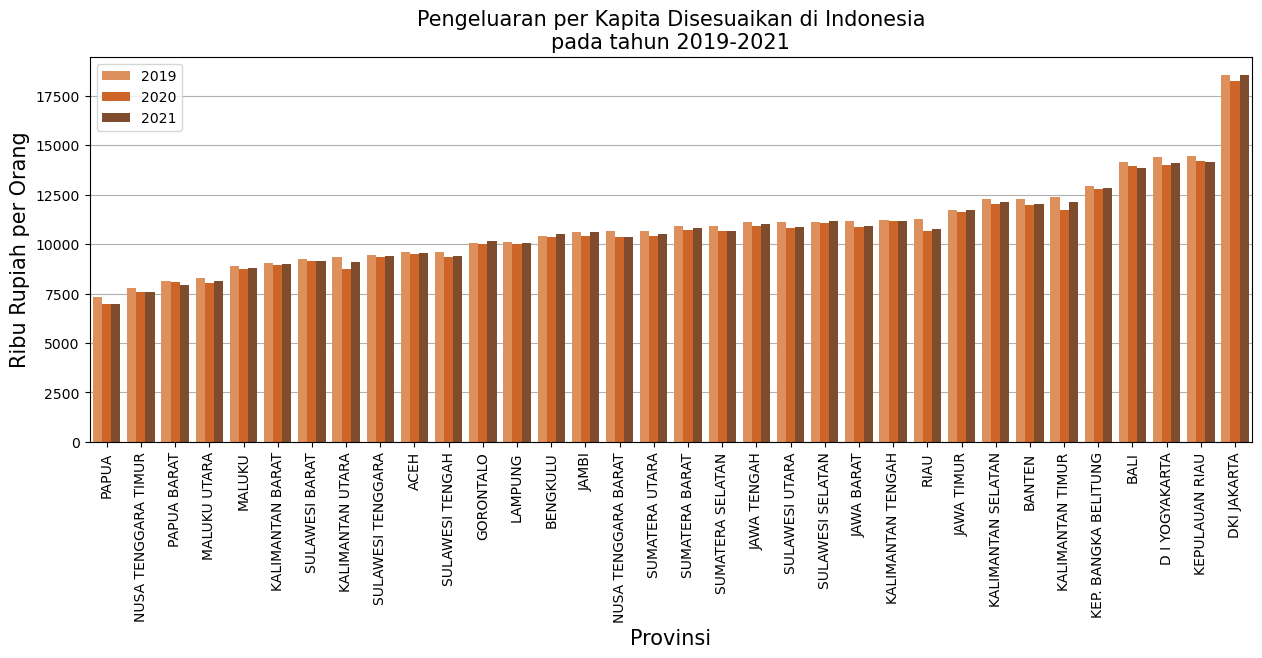

In [13]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=new_datsos,x='Provinsi',y='PengeluaranperKapitaDisesuaikanRibuRupiahOrang',hue='Tahun',
                order=new_datsos[new_datsos['Tahun']==2019].sort_values(by='PengeluaranperKapitaDisesuaikanRibuRupiahOrang').Provinsi,
                palette='Oranges_d')
plt.legend(loc='upper left')
ax.tick_params(axis='x', rotation=90)
plt.xlabel('Provinsi',fontdict={'fontsize':15})
plt.ylabel('Ribu Rupiah per Orang',fontdict={'fontsize':15})
plt.title('Pengeluaran per Kapita Disesuaikan di Indonesia\npada tahun 2019-2021',fontdict={'fontsize':15})
ax.grid(axis='y', which='major')
ax.set_axisbelow(True)

Berapa jumlah provinsi yang tingkat ekonomi masyarakatnya menurun/meningkat ketika pandemi COVID-19 sedang merebak?

In [14]:
total = len(df_datsos['Provinsi'].unique())

cond1 = df_datsos['PengeluaranperKapitaDisesuaikanRibuRupiahOrang2020'] >= df_datsos['PengeluaranperKapitaDisesuaikanRibuRupiahOrang2019']
high1 = df_datsos['Provinsi'][cond1].count()
low1 = total - high1

cond2 = df_datsos['PengeluaranperKapitaDisesuaikanRibuRupiahOrang2021'] >= df_datsos['PengeluaranperKapitaDisesuaikanRibuRupiahOrang2020']
high2 = df_datsos['Provinsi'][cond2].count()
low2 = total - high2

cond3 = df_datsos['PengeluaranperKapitaDisesuaikanRibuRupiahOrang2021'] >= df_datsos['PengeluaranperKapitaDisesuaikanRibuRupiahOrang2019']
high3 = df_datsos['Provinsi'][cond3].count() #sudah recover
low3 = total - high3 

print(f"Jumlah provinsi untuk tiap tren tingkat ekonomi:")
print(f"\t2019 ke 2020: {high1} ({high1/total*100:.2f}%) meningkat dan {low1} ({low1/total*100:.2f}%) menurun")
print(f"\t2020 ke 2021: {high2} ({high2/total*100:.2f}%) meningkat dan {low2} ({low2/total*100:.2f}%) menurun, dengan {high3} ({high3/total*100:.2f}%) sudah recover")

Jumlah provinsi untuk tiap tren tingkat ekonomi:
	2019 ke 2020: 0 (0.00%) meningkat dan 34 (100.00%) menurun
	2020 ke 2021: 29 (85.29%) meningkat dan 5 (14.71%) menurun, dengan 3 (8.82%) sudah recover


Provinsi Bengkulu, Sulawesi Selatan, dan Gorontalo berhasil me-*recover* tingkat ekonomi mereka pada tahun 2021!

In [15]:
df_datsos[cond3]['Provinsi']

6             BENGKULU
26    SULAWESI SELATAN
28           GORONTALO
Name: Provinsi, dtype: object

Bagaimana persebaran pertumbuhan tingkat ekonomi dari setiap provinsi semenjak pandemi COVID-19 merebak?

Text(0.5, 1.0, 'Pertumbuhan Besar Pengeluaran per Kapita Disesuaikan\ndi Indonesia')

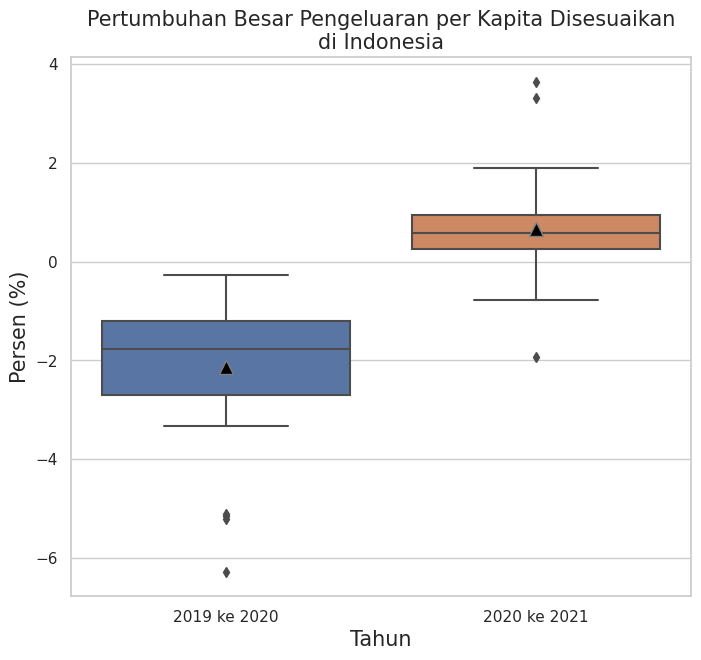

In [16]:
inc1 = (df_datsos['PengeluaranperKapitaDisesuaikanRibuRupiahOrang2020'] - df_datsos['PengeluaranperKapitaDisesuaikanRibuRupiahOrang2019'])/df_datsos['PengeluaranperKapitaDisesuaikanRibuRupiahOrang2019']*100
inc2 = (df_datsos['PengeluaranperKapitaDisesuaikanRibuRupiahOrang2021'] - df_datsos['PengeluaranperKapitaDisesuaikanRibuRupiahOrang2020'])/df_datsos['PengeluaranperKapitaDisesuaikanRibuRupiahOrang2020']*100
inc = pd.DataFrame({'Provinsi': df_datsos['Provinsi'],
                    '2019 ke 2020':inc1,
                    '2020 ke 2021':inc2})

plt.figure(figsize=(8,7))
sns.set_theme(style="whitegrid")
sns.boxplot(data=inc,showmeans=True,
            meanprops={"markerfacecolor":"black", 
                       "markeredgecolor":"grey",
                       "markersize":"10"})
plt.xlabel('Tahun',fontdict={'fontsize':15})
plt.ylabel('Persen (%)',fontdict={'fontsize':15})
plt.title('Pertumbuhan Besar Pengeluaran per Kapita Disesuaikan\ndi Indonesia',fontdict={'fontsize':15})

In [17]:
inc.describe()

,2019 ke 2020,2020 ke 2021
count,34.000000,34.000000
mean,-2.132424,0.669546
std,1.463582,1.014530
min,-6.282779,-1.941628
25%,-2.695384,0.251069
50%,-1.767008,0.574079
75%,-1.199988,0.941439
max,-0.278605,3.643216


Pada tahun 2020, seluruh provinsi mengalami pertumbuhan besar pengeluaran per kapita yang negatif dengan rata-rata sebesar -2.13%. Hal ini menunjukkan bahwa terjadi pelemahan tingkat ekonomi di Indonesia semenjak pandemi COVID-19 menyebar pada tahun 2020. Jika diperhatikan, terdapat 4 provinsi yang tingkat ekonominya menurun sangat signifikan dibandingkan dengan provinsi-provinsi lainnya. Keempat provinsi tersebut dengan pertumbuhan tingkat ekonomi paling rendah secara berturut-turut adalah Kalimantan Utara, Papua, Riau, dan Kalimantan Timur.

In [18]:
inc.sort_values(by='2019 ke 2020').head(5)

,Provinsi,2019 ke 2020,2020 ke 2021
23,KALIMANTAN UTARA,-6.282779,3.643216
33,PAPUA,-5.207197,0.014380
3,RIAU,-5.153265,0.571429
22,KALIMANTAN TIMUR,-5.105591,3.308322
31,MALUKU UTARA,-3.322099,1.344622


Sementara, pada tahun berikutnya, terlihat bahwa besar pengeluaran per kapita di sebagian besar provinsi sudah mengalami pertumbuhan yang positif dengan rata-rata sebesar 0.67%. Hal ini menunjukkan adanya perbaikan terhadap tingkat ekonomi masyarakat setelah setahun menghadapi kondisi pandemi. Namun, tingkat ekonomi di beberapa provinsi masih bergerak turun. Provinsi dengan pertumbuhan negatif paling signifikan pada tahun 2021 adalah Papua Barat (-1.94%) dan Bali (-0.78%).

In [19]:
inc.sort_values(by='2020 ke 2021').head(2).append(inc.sort_values(by='2020 ke 2021').tail(2))

,Provinsi,2019 ke 2020,2020 ke 2021
32,PAPUA BARAT,-0.480000,-1.941628
16,BALI,-1.534003,-0.782540
22,KALIMANTAN TIMUR,-5.105591,3.308322
23,KALIMANTAN UTARA,-6.282779,3.643216


Dua provinsi yang sebelumnya berada di tingkat pertumbuhan ekonomi negatif yang signifikan pada tahun 2020, yaitu Provinsi Kalimantan Utara dan Kalimantan Timur, ternyata mengalami pertumbuhan positif yang sangat signifikan dibandingkan mayoritas provinsi lainnya pada tahun berikutnya (tahun 2021). Hal ini mengindikasikan tingginya kemampuan adaptasi rata-rata masyarakat pada kedua provinsi tersebut dengan cepat setelah terpuruk akibat pandemi COVID-19. Dari fakta yang ditemukan ini, pemerintah daerah (pemda) dari provinsi lainnya dapat melakukan studi banding dari pemda Provinsi Kalimantan Utara dan Kalimantan Timur terkait strategi dalam pemulihan tingkat ekonomi masyarakat di daerahnya.

### 2. Bagaimana harapan hidup masyarakat imbas COVID-19? 

>Publikasi BPS "Indeks Pembangunan Manusia 2020":
>
>Umur harapan hidup saat lahir yang mewakili dimensi umur panjang dan hidup sehat di Indonesia secara konsisten terus meningkat dari tahun ke tahun. Hal ini menunjukkan bahwa bayi yang baru lahir mempunyai harapan untuk dapat menjalani hidup lebih panjang. Secara tidak langsung, hal ini juga mencerminkan semakin baiknya derajat kesehatan masyarakat di Indonesia.

Secara umum, umur harapan hidup saat lahir (UHH) masyarakat di setiap provinsi selalu mengalami sedikit peningkatan, dengan rata-rata peningkatan sebesar 0.22% pada tahun 2019-2020 dan 0.16% pada tahun 2020-2021. Hal ini menunjukkan bahwa tingkat harapan hidup bayi yang baru lahir pada setiap tahunnya secara konsisten mengalami peningkatan, meskipun pandemi COVID-19 melanda. Namun, laju rata-rata pertumbuhan UHH sedikit mengalami penurunan setelah 1 tahun pandemi COVID-19 berlangsung. Kondisi ini dapat mencerminkan bahwa terjadi sedikit pelemahan di sisi perbaikan kualitas dan kinerja fasilitas kesehatan bagi bayi yang baru lahir karena harus turut berjuang dalam pencegahan COVID-19 dan perawatan pasien bukan bayi yang terjangkit COVID-19.

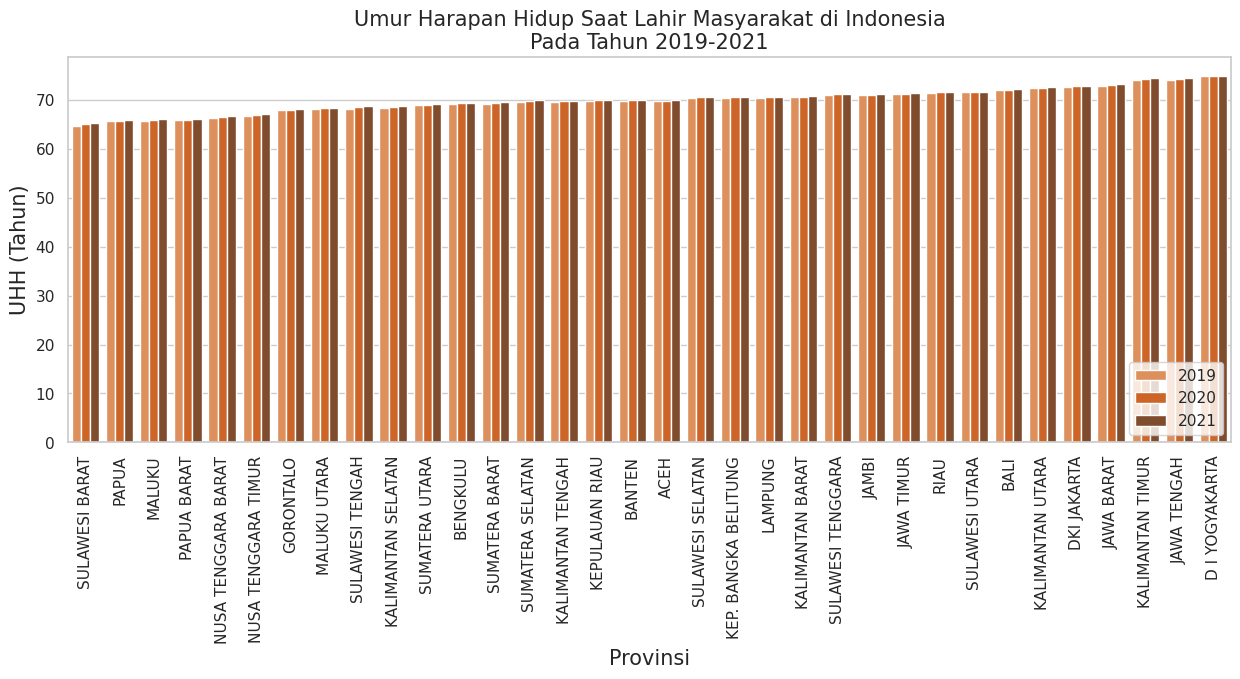

In [20]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=new_datsos,x='Provinsi',y='UmurHarapanHidupSaatLahirUHH',hue='Tahun',
    order=new_datsos[new_datsos['Tahun']==2019].sort_values(by='UmurHarapanHidupSaatLahirUHH').Provinsi,
    palette='Oranges_d')
plt.legend(loc='lower right')
ax.tick_params(axis='x', rotation=90)
plt.xlabel('Provinsi',fontdict={'fontsize':15})
plt.ylabel('UHH (Tahun)',fontdict={'fontsize':15})
plt.title('Umur Harapan Hidup Saat Lahir Masyarakat di Indonesia\nPada Tahun 2019-2021',fontdict={'fontsize':15})
sns.set_style(style="whitegrid")

Text(0.5, 1.0, 'Pertumbuhan Nilai Umur Harapan Hidup Saat Lahir\n Pada Tahun 2019-2021')

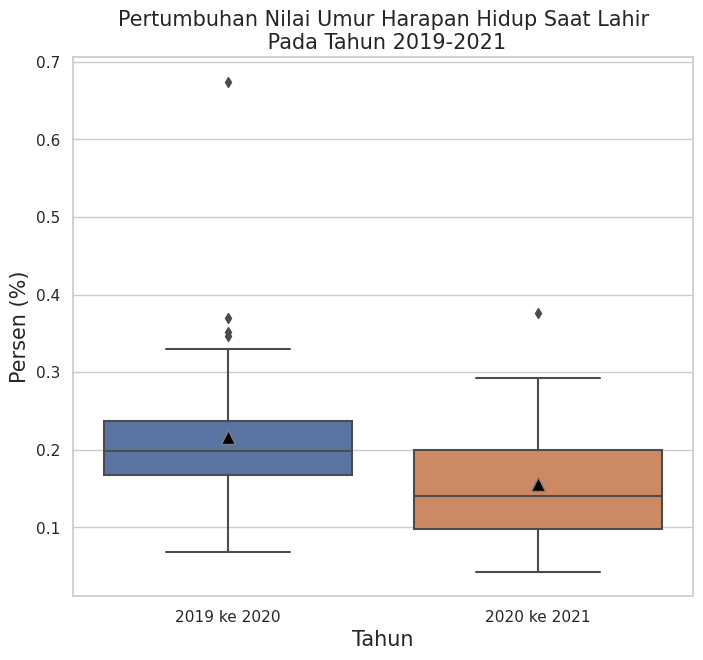

In [21]:
inc1 = (df_datsos['UmurHarapanHidupSaatLahirUHH2020'] - df_datsos['UmurHarapanHidupSaatLahirUHH2019'])/df_datsos['UmurHarapanHidupSaatLahirUHH2019']*100
inc2 = (df_datsos['UmurHarapanHidupSaatLahirUHH2021'] - df_datsos['UmurHarapanHidupSaatLahirUHH2020'])/df_datsos['UmurHarapanHidupSaatLahirUHH2020']*100
inc = pd.DataFrame({'Provinsi':df_datsos['Provinsi'],
                    '2019 ke 2020':inc1,
                    '2020 ke 2021':inc2})

plt.figure(figsize=(8,7))
sns.set_theme(style="whitegrid")
sns.boxplot(data=inc,showmeans=True,
            meanprops={"markerfacecolor":"black", 
                       "markeredgecolor":"grey",
                       "markersize":"10"})
plt.xlabel('Tahun',fontdict={'fontsize':15})
plt.ylabel('Persen (%)',fontdict={'fontsize':15})
plt.title('Pertumbuhan Nilai Umur Harapan Hidup Saat Lahir\n Pada Tahun 2019-2021',fontdict={'fontsize':15})

In [22]:
inc.describe()

,2019 ke 2020,2020 ke 2021
count,34.000000,34.000000
mean,0.216638,0.156170
std,0.108639,0.075118
min,0.068927,0.042900
25%,0.168056,0.098080
50%,0.198680,0.140129
75%,0.237218,0.199894
max,0.674190,0.376699


Pertumbuhan tingkat harapan hidup masyarakat pada tahun 2020 di 3 provinsi di Pulau Sulawesi berada cukup jauh atas rata-rata persentase pertumbuhan tingkat harapan hidup di Indonesia. Ketiga provinsi ini adalah Sulawesi Tengah (0.67%), Sulawesi Barat (0.37%), dan Sulawesi Tenggara (0.35%). 

In [23]:
inc.sort_values(by='2019 ke 2020').head(5).append(inc.sort_values(by='2019 ke 2020').tail(5))

,Provinsi,2019 ke 2020,2020 ke 2021
23,KALIMANTAN UTARA,0.068927,0.082656
20,KALIMANTAN TENGAH,0.071746,0.071695
0,ACEH,0.085874,0.042900
13,D I YOGYAKARTA,0.093433,0.066676
4,JAMBI,0.140726,0.084317
5,SUMATERA SELATAN,0.330223,0.143102
17,NUSA TENGGARA BARAT,0.347013,0.270636
27,SULAWESI TENGGARA,0.352262,0.070205
29,SULAWESI BARAT,0.370256,0.292038
25,SULAWESI TENGAH,0.674190,0.203814


Provinsi Aceh, D.I. Yogyakarta, Kalimantan Tengah, dan Kalimantan Utara selama 2 tahun berturut-turut berada urutan 5 provinsi dengan peningkatan UHH paling rendah. Sebaliknya, Provinsi Sulawesi Barat dan Nusa Tenggara Barat menempati urutan 5 provinsi dengan peningkatan UHH paling tinggi pada tahun 2019-2021. 

In [24]:
inc.sort_values(by='2020 ke 2021').head(5).append(inc.sort_values(by='2020 ke 2021').tail(5))

,Provinsi,2019 ke 2020,2020 ke 2021
0,ACEH,0.085874,0.042900
13,D I YOGYAKARTA,0.093433,0.066676
27,SULAWESI TENGGARA,0.352262,0.070205
20,KALIMANTAN TENGAH,0.071746,0.071695
23,KALIMANTAN UTARA,0.068927,0.082656
21,KALIMANTAN SELATAN,0.248211,0.247597
11,JAWA BARAT,0.260810,0.260131
17,NUSA TENGGARA BARAT,0.347013,0.270636
29,SULAWESI BARAT,0.370256,0.292038
22,KALIMANTAN TIMUR,0.148208,0.376699


### 3. Apa UMKM yang bisa disupport oleh pemerintah di saat New Normal pasca COVID-19?
Hasil survey dari beberapa lembaga (BPS, Bappenas, dan World Bank) menunjukkan bahwa pandemi ini menyebabkan banyak UMKM kesulitan melunasi pinjaman serta membayar tagihan listrik, gas, dan gaji karyawan. Beberapa diantaranya sampai harus melakukan PHK. Kendala lain yang dialami UMKM, antara lain sulitnya memperoleh bahan baku, permodalan, pelanggan menurun, distribusi dan produksi terhambat.

Data diambil dari :


Analisis Hasil Survei Dampak Covid-19 Terhadap Pelaku Usaha Jilid 1 oleh Badan Pusat Statistik (BPS), ISBN: 978-602-438-350-3. 
1.   Persentase perusahaan yang mengalami penurunan pendapatan berdasarkan jenis usaha (3 terbesar dan 3 terendah),
2.   Persentase perusahaan yang mengalami penurunan pendapatan berdasarkan provinsi (4 terbesar),
3.   Persentase Usaha Menengah Kecil yang membutuhkan bantuan pemerintah.

Analisis Hasil Survei Dampak Covid-19 Terhadap Pelaku Usaha Jilid 2 oleh Badan Pusat Statistik (BPS), ISBN: 978-602-438-401-2.
1.   Persentase pelaku usaha berskala Mikro dan Kecil yang membutuhkan bantuan berupa Modal Usaha berdasarkan sektor.

In [25]:
# Input Data
# Persentase perusahaan yang mengalami penurunan pendapatan berdasarkan jenis usaha (3 terbesar dan 3 terendah)
dict1 = {'Sektor Usaha': ['Akomodasi', 'Jasa Lainnya', 'Transportasi', 'Air dan Limbah', 'Listrik dan Gas', 'Real Estate'],
        'Presentase': [92.47, 90.9, 90.34, 68, 67.85, 59.15]}
df1 = pd.DataFrame(dict1)

# Persentase perusahaan yang mengalami penurunan pendapatan berdasarkan provinsi (4 terbesar)
dict2 = {'Provinsi': ['Bali', 'DI Yogyakarta', 'DKI Jakarta', 'Banten'],
         'Presentase': [92.18, 89.69, 86.55, 86.91]}
df2 = pd.DataFrame(dict2)

# Persentase UMK yang membutuhkan bantuan pemerintah
dict3 = {'Jenis Bantuan': ['Bantuan Modal Usaha', 'Keringanan Tagihan Listrik', 'Relaksasi Pinjaman', 'Kemudahan Administrasi Pinjaman', 'Penundaan Pajak'],
         'Presentase': [69.02, 41.18, 29.98, 17.21, 15.07]}
df3 = pd.DataFrame(dict3)

# Persentase pelaku usaha berskala Mikro dan Kecil yang membutuhkan bantuan berupa Modal Usaha berdasarkan sektor
dict4 = {'Sektor usaha': ['Industri Pengolahan',
                          'Akomodasi',
                          'Perdangangan dan Reparasi Kendaraan',
                          'Informasi dan Komunikasi',
                          'Jasa Lainnya',
                          'Jasa Perusahaan',
                          'Listrik dan Gas',
                          'Transportasi',
                          'Konstruksi',
                          'Air dan Limbah',
                          'Pertambangan dan Penggalian',
                          'Keuangan dan Asuransi'],
         'Persentase': [90, 88, 86, 85, 85, 83, 82, 79, 78, 77, 76, 65]}
df4 = pd.DataFrame(dict4)

In [26]:
# Fungsi untuk menunjukkan angka pada grafik
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

Text(0.5, 1.0, 'Persentase UMKM yang Membutuhkan Bantuan Pemerintah Berdasarkan Jenis Bantuan')

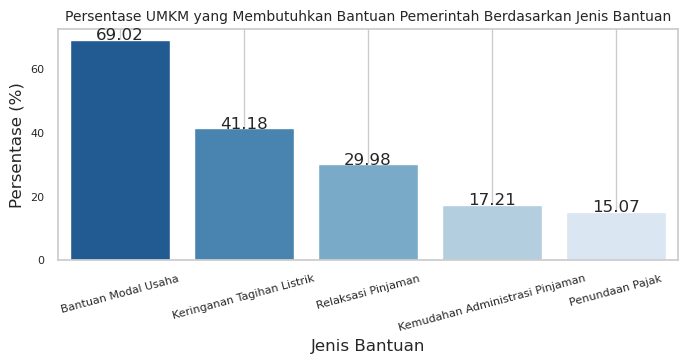

In [27]:
# Visualisasi Persentase UMKM yang Membutuhkan Bantuan Pemerintah Berdasarkan Jenis Bantuan
plt.figure(figsize=(8,3))
ax = sns.barplot(data=df3, 
                 x='Jenis Bantuan', 
                 y='Presentase', 
                 palette="Blues_r")

plt.xlabel("Jenis Bantuan", fontdict = {'fontsize' : 12})
plt.ylabel("Persentase (%)", fontdict = {'fontsize' : 12})
plt.yticks(fontsize=8)
plt.xticks(fontsize=8, rotation=15)
plt.grid()
show_values_on_bars(ax)
plt.title("Persentase UMKM yang Membutuhkan Bantuan Pemerintah Berdasarkan Jenis Bantuan", fontdict = {'fontsize' : 10})

Text(0.5, 1.0, 'Persentase UMKM yang Membutuhkan Bantuan Modal Usaha berdasarkan Sektor Usaha')

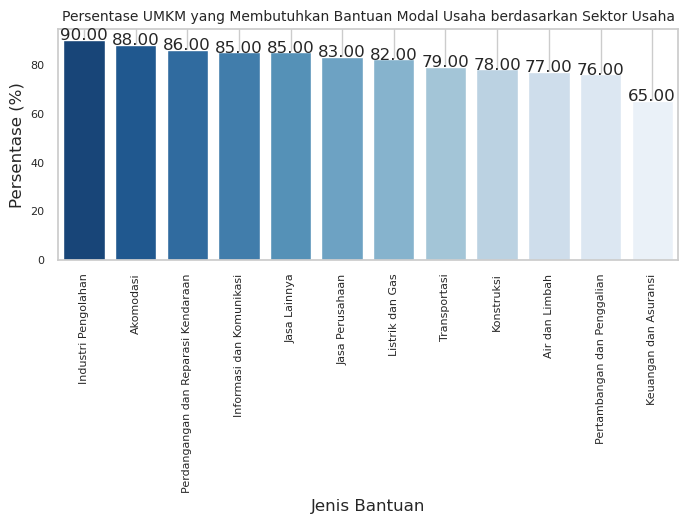

In [28]:
# Visualisasi Persentase UMKM yang Membutuhkan Bantuan Modal Usaha berdasarkan Sektor Usaha
plt.figure(figsize=(8,3))
ax = sns.barplot(data=df4, 
                 x='Sektor usaha', 
                 y='Persentase', 
                 palette="Blues_r")

plt.xlabel("Jenis Bantuan", fontdict = {'fontsize' : 12})
plt.ylabel("Persentase (%)", fontdict = {'fontsize' : 12})
plt.yticks(fontsize=8)
plt.xticks(fontsize=8, rotation=90)
plt.grid()
show_values_on_bars(ax)
plt.title("Persentase UMKM yang Membutuhkan Bantuan Modal Usaha berdasarkan Sektor Usaha", fontdict = {'fontsize' : 10})

In [29]:
# Visualisasi persentase perusahaan yang mengalami penurunan pendapatan berdasarkan jenis usaha (3 terbesar dan 3 terendah)
df1

,Sektor Usaha,Presentase
0,Akomodasi,92.47
1,Jasa Lainnya,90.90
2,Transportasi,90.34
3,Air dan Limbah,68.00
4,Listrik dan Gas,67.85
5,Real Estate,59.15


In [30]:
# Visualisasi persentase pelaku usaha berskala Mikro dan Kecil yang membutuhkan bantuan berupa Modal Usaha berdasarkan sektor.
df2

,Provinsi,Presentase
0,Bali,92.18
1,DI Yogyakarta,89.69
2,DKI Jakarta,86.55
3,Banten,86.91


Hasil analisis: UMKM yang dapat didukung pemerintah saat new normal pasca COVID-19 utamanya adalah sektor Akomodasi. Hal ini dikarenakan sebanyak 92% pelaku UMKM di sektor usaha Akomodasi mengalami penurunan pendapatan tertinggi dan sebanyak 88% pelaku UMKM di sektor tersebut menyatakan membutuhkan bantuan Modal Usaha. Prioritas kedua adalah sektor usaha dengan penurunan pendapatan tinggi lainnya, yaitu sektor Jasa Lainnya dan Transportasi. Terakhir, prioritas selanjutnya adalah sektor usaha yang paling banyak membutuhkan Bantuan Modal Usaha.

### 4. Bagaimana tingkat kemiskinan masyarakat terdampak COVID-19?

Untuk mengukur kemiskinan, konsep kebutuhan dasar berdasarkan Handbook on Poverty and Inequality yang diterbitkan oleh Worldbank akan digunakan. Terdapat dua parameter untuk mengukur tingkat kemiskinan masyarakat terdampak COVID-19, yaitu Indeks Kedalaman Kemiskinan (Poverty Gap Index) dan Indeks Keparahan Kemiskinan (Poverty Severity Index). 

#### **Poverty Gap Index**
Indeks Kedalaman Kemiskinan <br>
Indeks Kedalaman Kemiskinan adalah parameter yang mengukur sejauh mana rata-rata individu jatuh di bawah garis kemiskinan yang menunjukkan berapa fraksi dari penghasilan minimum yang harus dikumpulkan dari tiap penduduk dan dialokasikan untuk menghilangkan kemiskinan.

In [31]:
# Analisis Indeks Kedalaman Kemiskinan Nasional
poverty_gap = pd.DataFrame({'2019': new_datsos["IndeksKedalamanKemiskinanP1MenurutKabupatenKota"][new_datsos["Tahun"]==2019],
                            '2020': new_datsos["IndeksKedalamanKemiskinanP1MenurutKabupatenKota"][new_datsos["Tahun"]==2020],
                            '2021': new_datsos["IndeksKedalamanKemiskinanP1MenurutKabupatenKota"][new_datsos["Tahun"]==2021]})

print("Indeks Kedalaman Kemiskinan Nasional (Poverty Gap Index)")
display(poverty_gap.describe())

Indeks Kedalaman Kemiskinan Nasional (Poverty Gap Index)


,2019,2020,2021
count,34.000000,34.000000,34.000000
mean,1.842353,1.864118,1.897059
std,1.443300,1.341320,1.252301
min,0.500000,0.520000,0.610000
25%,0.917500,1.002500,1.045000
50%,1.410000,1.520000,1.505000
75%,2.305000,2.320000,2.380000
max,7.170000,6.160000,5.600000


Text(0.5, 1.0, 'Indeks Kedalaman Kemiskinan Indonesia')

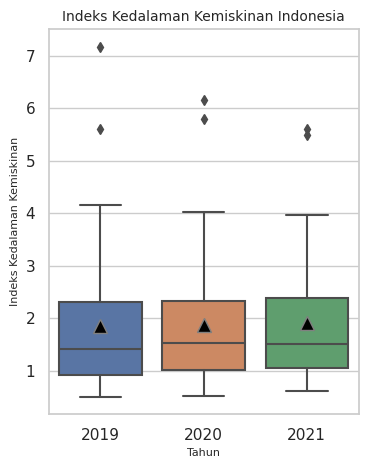

In [32]:
# Visualisasi Indeks Kedalaman Kemiskinan Nasional
plt.figure(figsize=(4,5))
sns.set_theme(style="whitegrid")
box_plot = sns.boxplot(data=poverty_gap,showmeans=True,
            meanprops={"markerfacecolor":"black", 
                       "markeredgecolor":"grey",
                       "markersize":"10"})

plt.xlabel('Tahun', fontdict = {'fontsize' : 8})
plt.ylabel('Indeks Kedalaman Kemiskinan', fontdict = {'fontsize' : 8})
plt.title('Indeks Kedalaman Kemiskinan Indonesia', fontdict = {'fontsize' : 10})

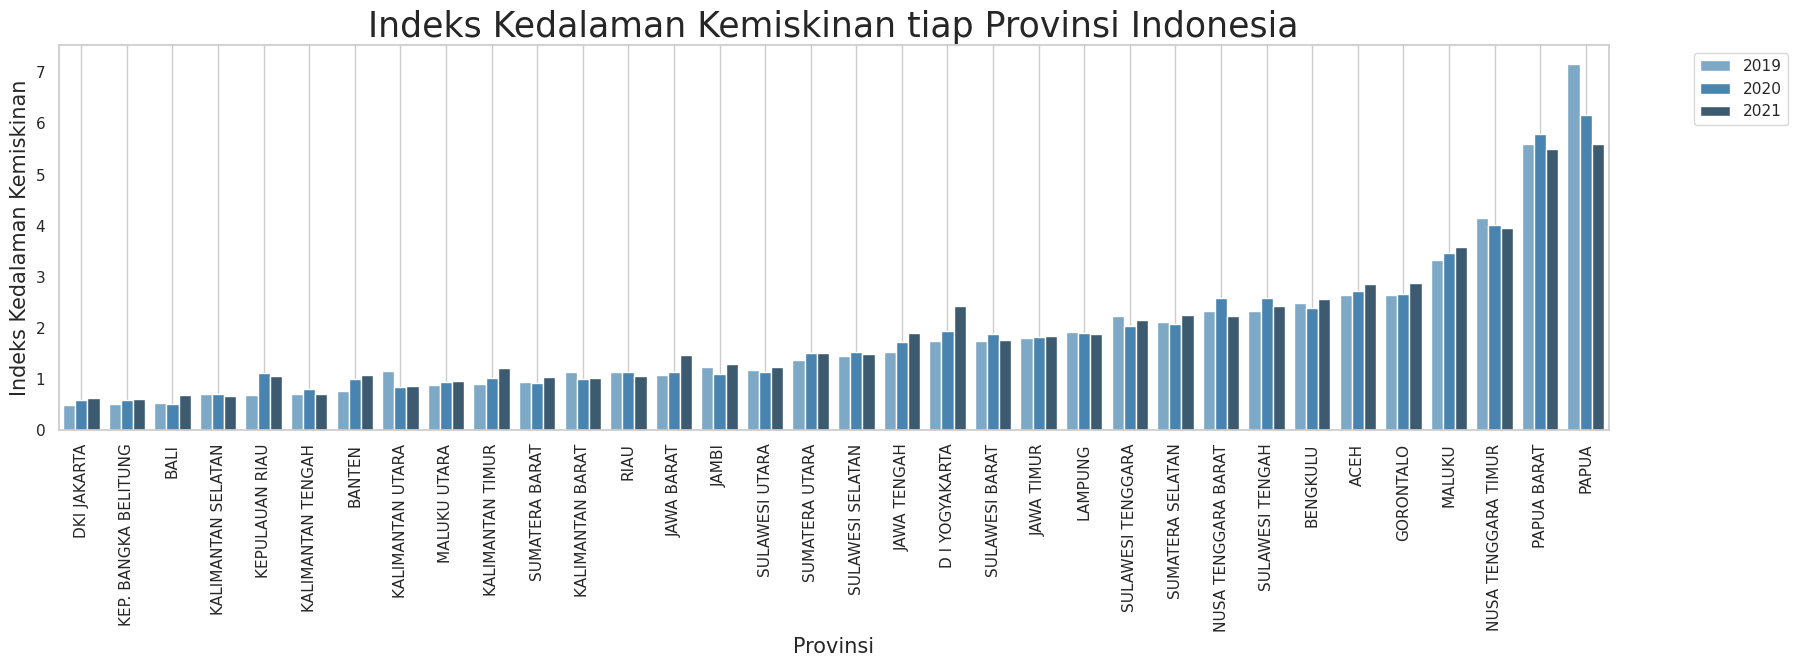

In [33]:
# Analisis Indeks Kedalaman Kemiskinan Perprovinsi
plt.figure(figsize=(20,5))

# Membuat barplot untuk visualisasi Indeks Kedalaman Kemiskinan
ax = sns.barplot(data=new_datsos.sort_values('IndeksKedalamanKemiskinanP1MenurutKabupatenKota'), 
                 x='Provinsi', 
                 y='IndeksKedalamanKemiskinanP1MenurutKabupatenKota', 
                 hue='Tahun',
                 palette="Blues_d")

plt.ylabel("Indeks Kedalaman Kemiskinan", fontdict = {'fontsize' : 15})
plt.xlabel("Provinsi", fontdict = {'fontsize' : 15})
plt.grid()
plt.title("Indeks Kedalaman Kemiskinan tiap Provinsi Indonesia", fontdict = {'fontsize' : 25})
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
ax.tick_params(axis='x', rotation=90)

#### **Poverty Severity Index**
Indeks Keparahan Kemiskinan <br>
Parameter Indeks Kedalaman Kemiskinan mengabaikan ketimpangan kemiskinan diantara masyarakat miskin. Oleh karena itu, Indeks Keparahan Kemiskinan digunakan untuk mengetahui kesenjangan antarmasyarakat yang tergolong miskin. 

In [34]:
# Analisis skala nasional
poverty_severity = pd.DataFrame({'2019': new_datsos["IndeksKeparahanKemiskinanP2MenurutKabupatenKota"][new_datsos["Tahun"]==2019],
                                 '2020': new_datsos["IndeksKeparahanKemiskinanP2MenurutKabupatenKota"][new_datsos["Tahun"]==2020],
                                 '2021': new_datsos["IndeksKeparahanKemiskinanP2MenurutKabupatenKota"][new_datsos["Tahun"]==2021]})

print("Indeks Keparahan Kemiskinan Nasional (Poverty Gap Index)")
display(poverty_severity.describe())

Indeks Keparahan Kemiskinan Nasional (Poverty Gap Index)


,2019,2020,2021
count,34.000000,34.000000,34.000000
mean,0.484118,0.491176,0.495000
std,0.517705,0.465551,0.414358
min,0.100000,0.100000,0.110000
25%,0.210000,0.230000,0.240000
50%,0.310000,0.365000,0.380000
75%,0.562500,0.552500,0.605000
max,2.600000,2.080000,1.960000


Text(0.5, 1.0, 'Indeks Keparahan Kemiskinan Indonesia')

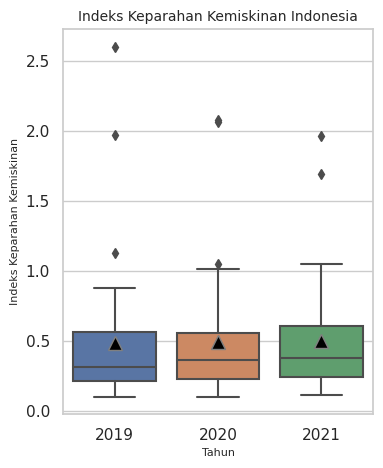

In [35]:
# Visualisasi Indeks Keparahan Kemiskinan Indonesia
plt.figure(figsize=(4,5))
sns.set_theme(style="whitegrid")
box_plot = sns.boxplot(data=poverty_severity,showmeans=True,
            meanprops={"markerfacecolor":"black", 
                       "markeredgecolor":"grey",
                       "markersize":"10"})

plt.xlabel('Tahun', fontdict = {'fontsize' : 8})
plt.ylabel('Indeks Keparahan Kemiskinan', fontdict = {'fontsize' : 8})
plt.title('Indeks Keparahan Kemiskinan Indonesia', fontdict = {'fontsize' : 10})

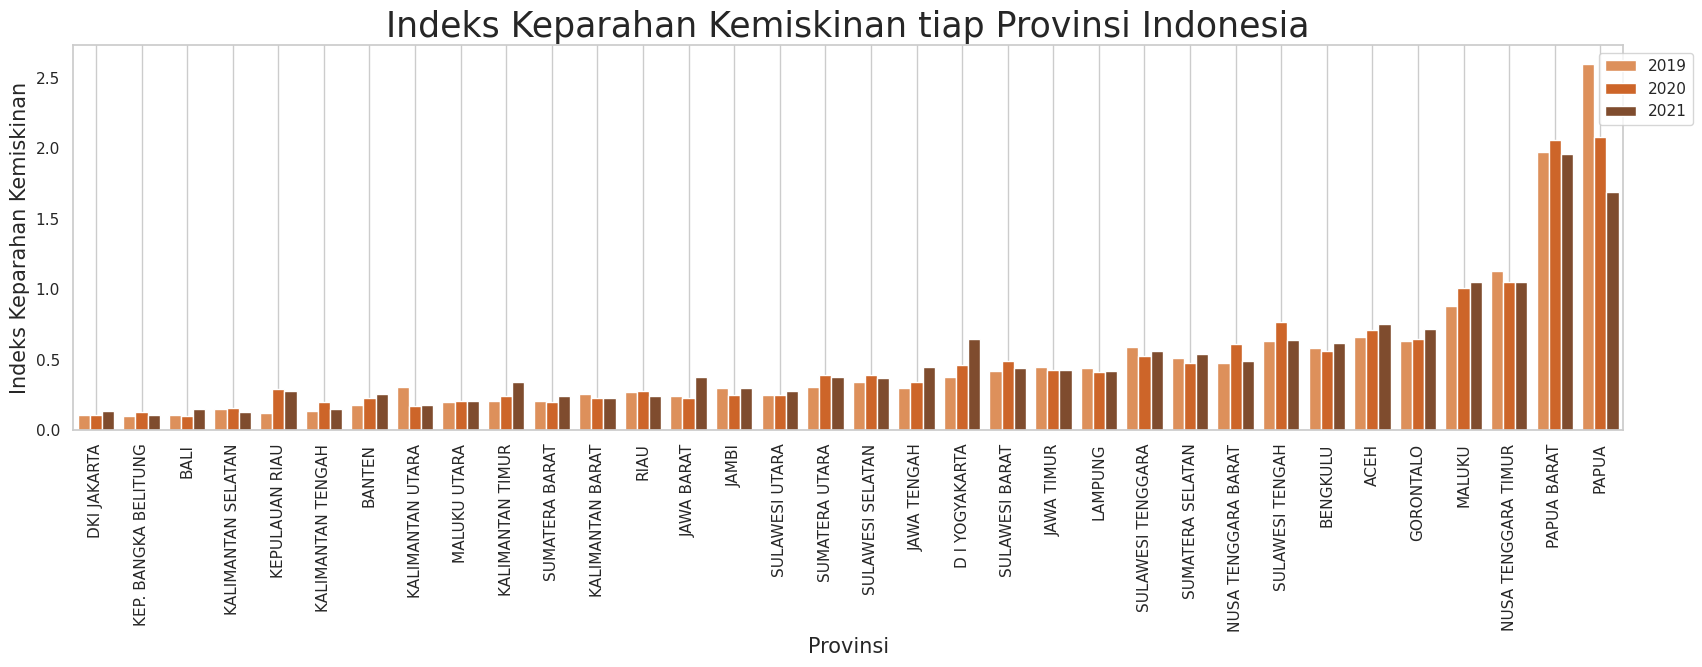

In [36]:
# Analisis Indeks Keparahan Kemiskinan Perprovinsi
plt.figure(figsize=(20,5))
ax = sns.barplot(data=new_datsos.sort_values('IndeksKedalamanKemiskinanP1MenurutKabupatenKota'),
                 x='Provinsi',
                 y='IndeksKeparahanKemiskinanP2MenurutKabupatenKota',
                 hue='Tahun',
                 palette="Oranges_d")

plt.ylabel("Indeks Keparahan Kemiskinan", fontdict = {'fontsize' : 15})
plt.xlabel("Provinsi", fontdict = {'fontsize' : 15})
plt.grid()
plt.title("Indeks Keparahan Kemiskinan tiap Provinsi Indonesia", fontdict = {'fontsize' : 25})
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
ax.tick_params(axis='x', rotation=90)

plt.legend(loc='best',bbox_to_anchor=(1.05, 1))
ax.tick_params(axis='x', rotation=90)

Rata-rata tingkat kemiskinan masyarakat terdampak COVID-19 secara nasional meningkat dari tahun 2019 hingga 2021. Hal ini dibuktikan dari:

*	Peningkatan rata-rata Indeks Kedalaman Kemiskinan yang artinya terjadi peningkatan perbedaan penghasilan penduduk terhadap garis batas kemiskinan, namun derajat atau tingkat keparahan kemiskinannya semakin merata (memiliki kesenjangan angka kemiskinan yang rendah).
*	Peningkatan rata-rata Indeks Keparahan Kemiskinan yang artinya terjadi peningkatan kesenjangan kemiskinan antar penduduk miskin, namun tingkat kesenjangan ini semakin merata secara nasional.

# Feature Engineering

Kita cek terlebih dahulu bagaimana distribusi dari masing-masing kolom data dalam bentuk histogram.

array([[<AxesSubplot:title={'center':'UmurHarapanHidupSaatLahirUHH2021'}>,
        <AxesSubplot:title={'center':'HarapanLamaSekolah2019'}>,
        <AxesSubplot:title={'center':'HarapanLamaSekolah2020'}>,
        <AxesSubplot:title={'center':'HarapanLamaSekolah2021'}>,
        <AxesSubplot:title={'center':'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2019'}>],
       [<AxesSubplot:title={'center':'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2020'}>,
        <AxesSubplot:title={'center':'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2021'}>,
        <AxesSubplot:title={'center':'Rata-rataLamaSekolah2019'}>,
        <AxesSubplot:title={'center':'Rata-rataLamaSekolah2020'}>,
        <AxesSubplot:title={'center':'Rata-rataLamaSekolah2021'}>],
       [<AxesSubplot:title={'center':'UmurHarapanHidupSaatLahirUHH2019'}>,
        <AxesSubplot:title={'center':'UmurHarapanHidupSaatLahirUHH2020'}>,
        <AxesSubplot:title={'center':'IndeksPembangunanManusia2019'}>,
        <AxesSubplot:title=

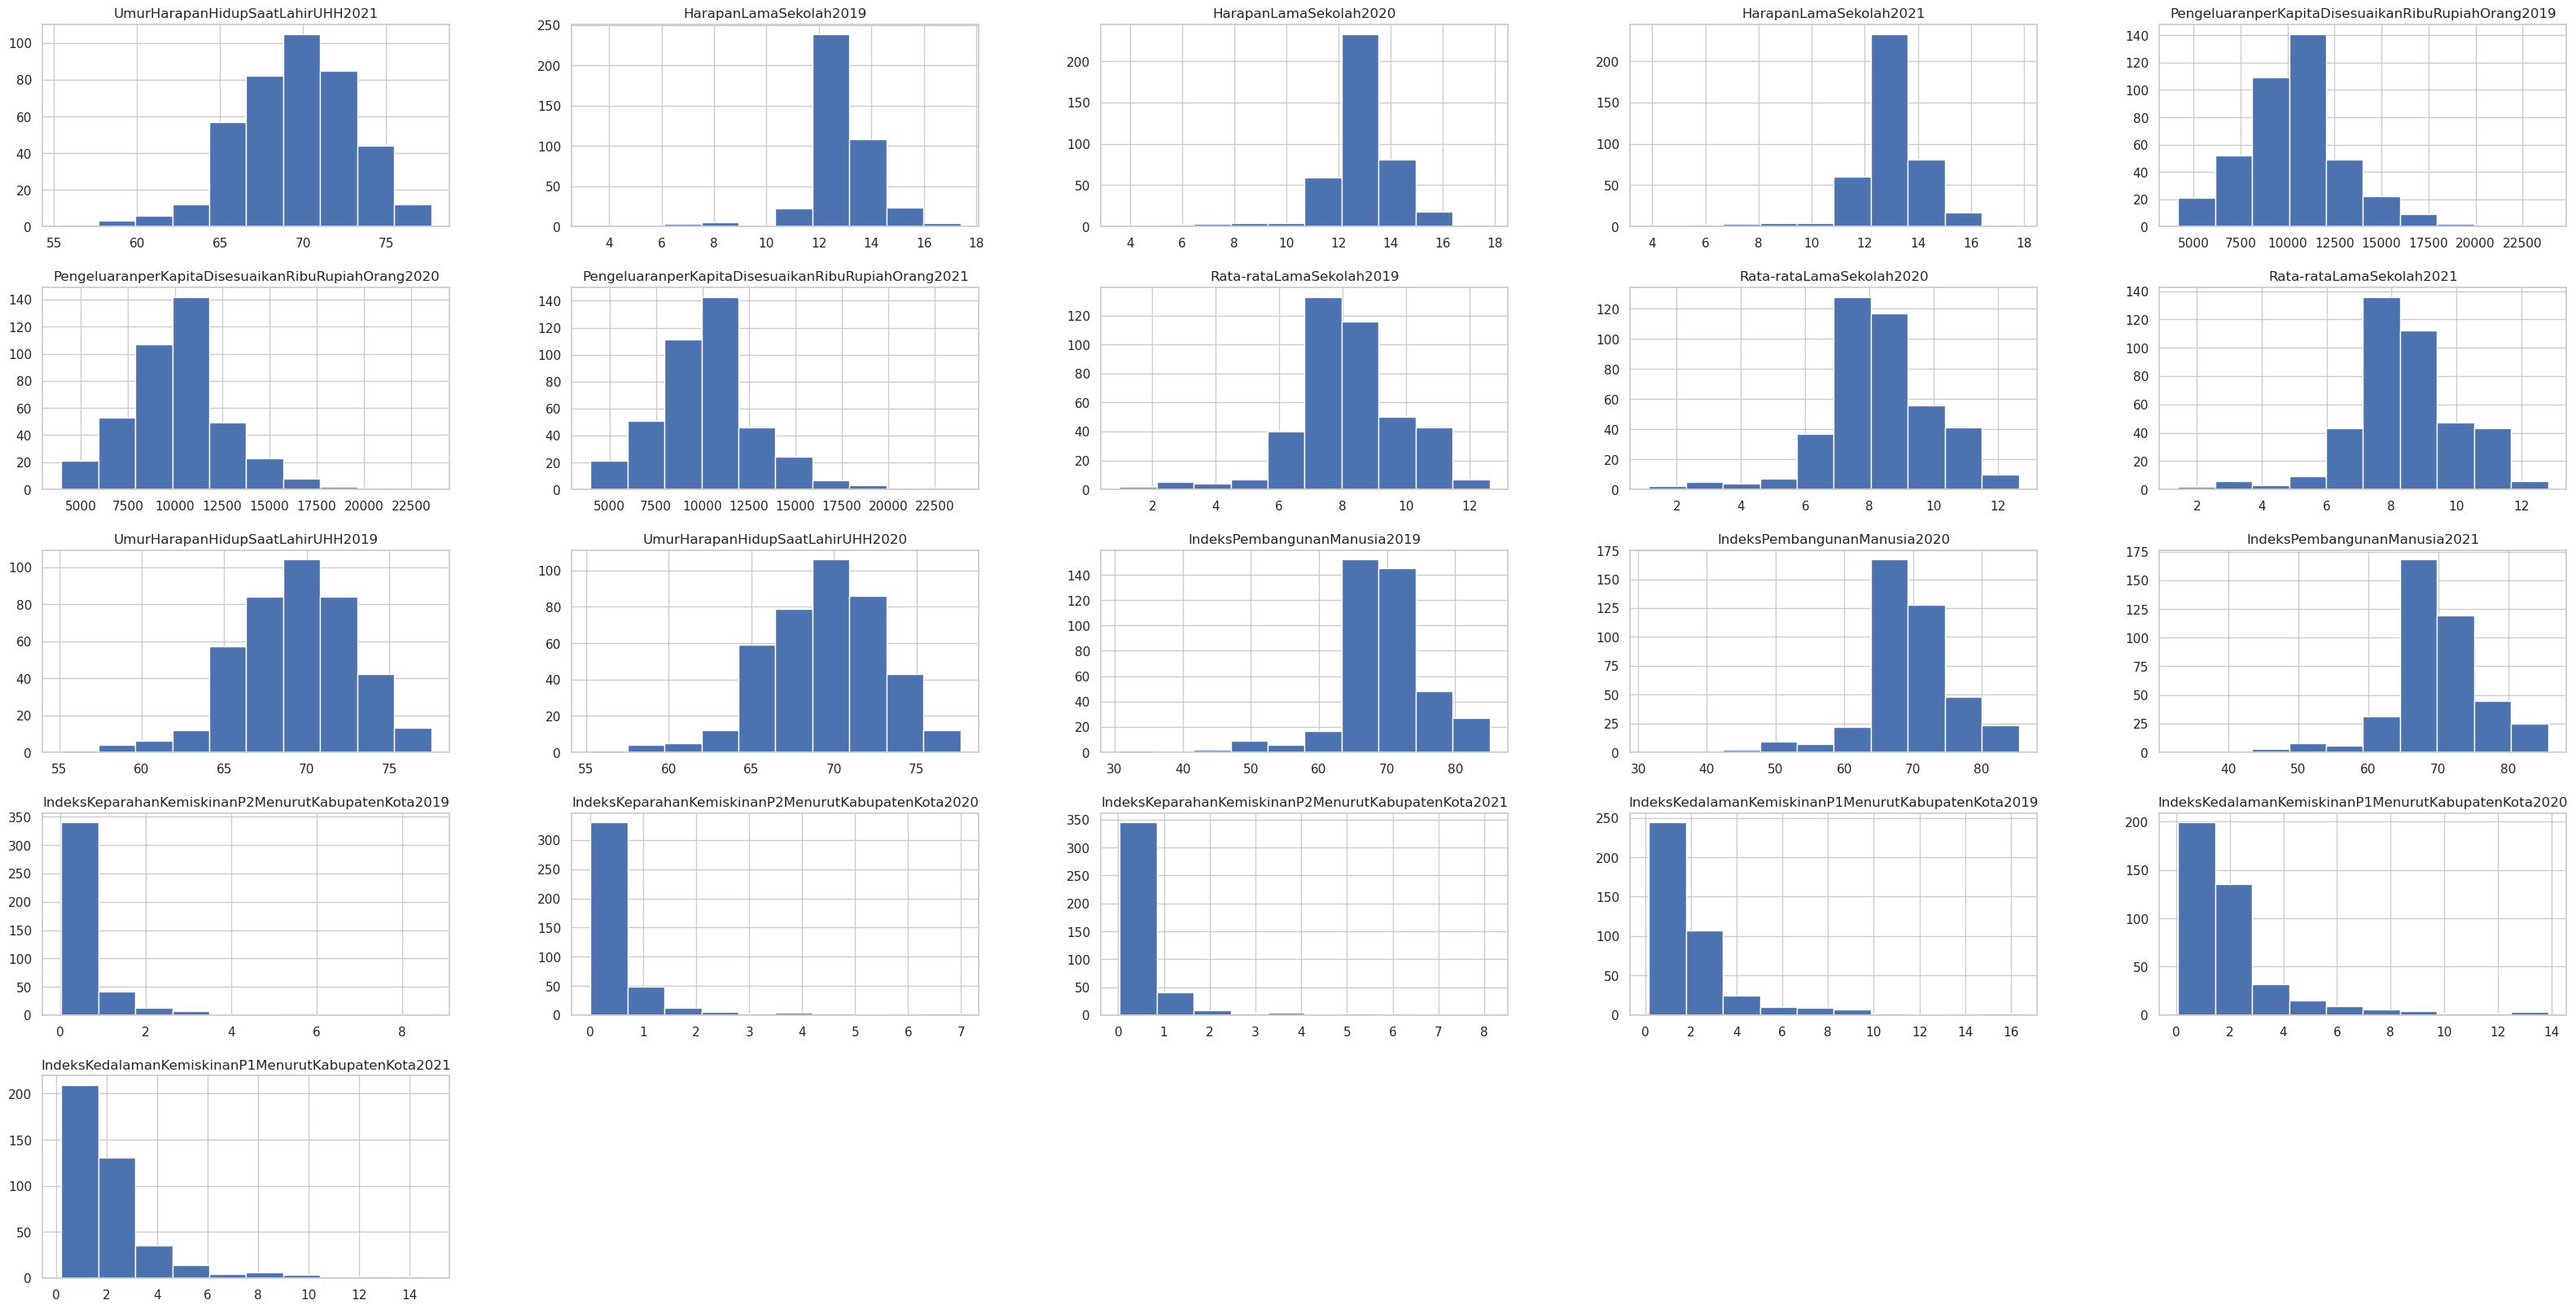

In [37]:
features = ['UmurHarapanHidupSaatLahirUHH2021',
    'HarapanLamaSekolah2019', 'HarapanLamaSekolah2020', 'HarapanLamaSekolah2021',
    'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2019',
    'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2020',
    'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2021',
    'Rata-rataLamaSekolah2019', 'Rata-rataLamaSekolah2020', 'Rata-rataLamaSekolah2021',
    'UmurHarapanHidupSaatLahirUHH2019', 'UmurHarapanHidupSaatLahirUHH2020',
    'IndeksPembangunanManusia2019', 'IndeksPembangunanManusia2020', 'IndeksPembangunanManusia2021',
    'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2019',
    'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2020',
    'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2021',
    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2019',
    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2020',
    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2021',
]
df_train[features].hist(bins=10, figsize=(40,20))

array([[<AxesSubplot:title={'center':'HarapanLamaSekolah2019'}>,
        <AxesSubplot:title={'center':'HarapanLamaSekolah2020'}>,
        <AxesSubplot:title={'center':'HarapanLamaSekolah2021'}>,
        <AxesSubplot:title={'center':'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2019'}>],
       [<AxesSubplot:title={'center':'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2020'}>,
        <AxesSubplot:title={'center':'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2021'}>,
        <AxesSubplot:title={'center':'Rata-rataLamaSekolah2019'}>,
        <AxesSubplot:title={'center':'Rata-rataLamaSekolah2020'}>],
       [<AxesSubplot:title={'center':'Rata-rataLamaSekolah2021'}>,
        <AxesSubplot:title={'center':'UmurHarapanHidupSaatLahirUHH2019'}>,
        <AxesSubplot:title={'center':'UmurHarapanHidupSaatLahirUHH2020'}>,
        <AxesSubplot:title={'center':'IndeksPembangunanManusia2019'}>],
       [<AxesSubplot:title={'center':'IndeksPembangunanManusia2020'}>,
        <AxesSubplot:title={'c

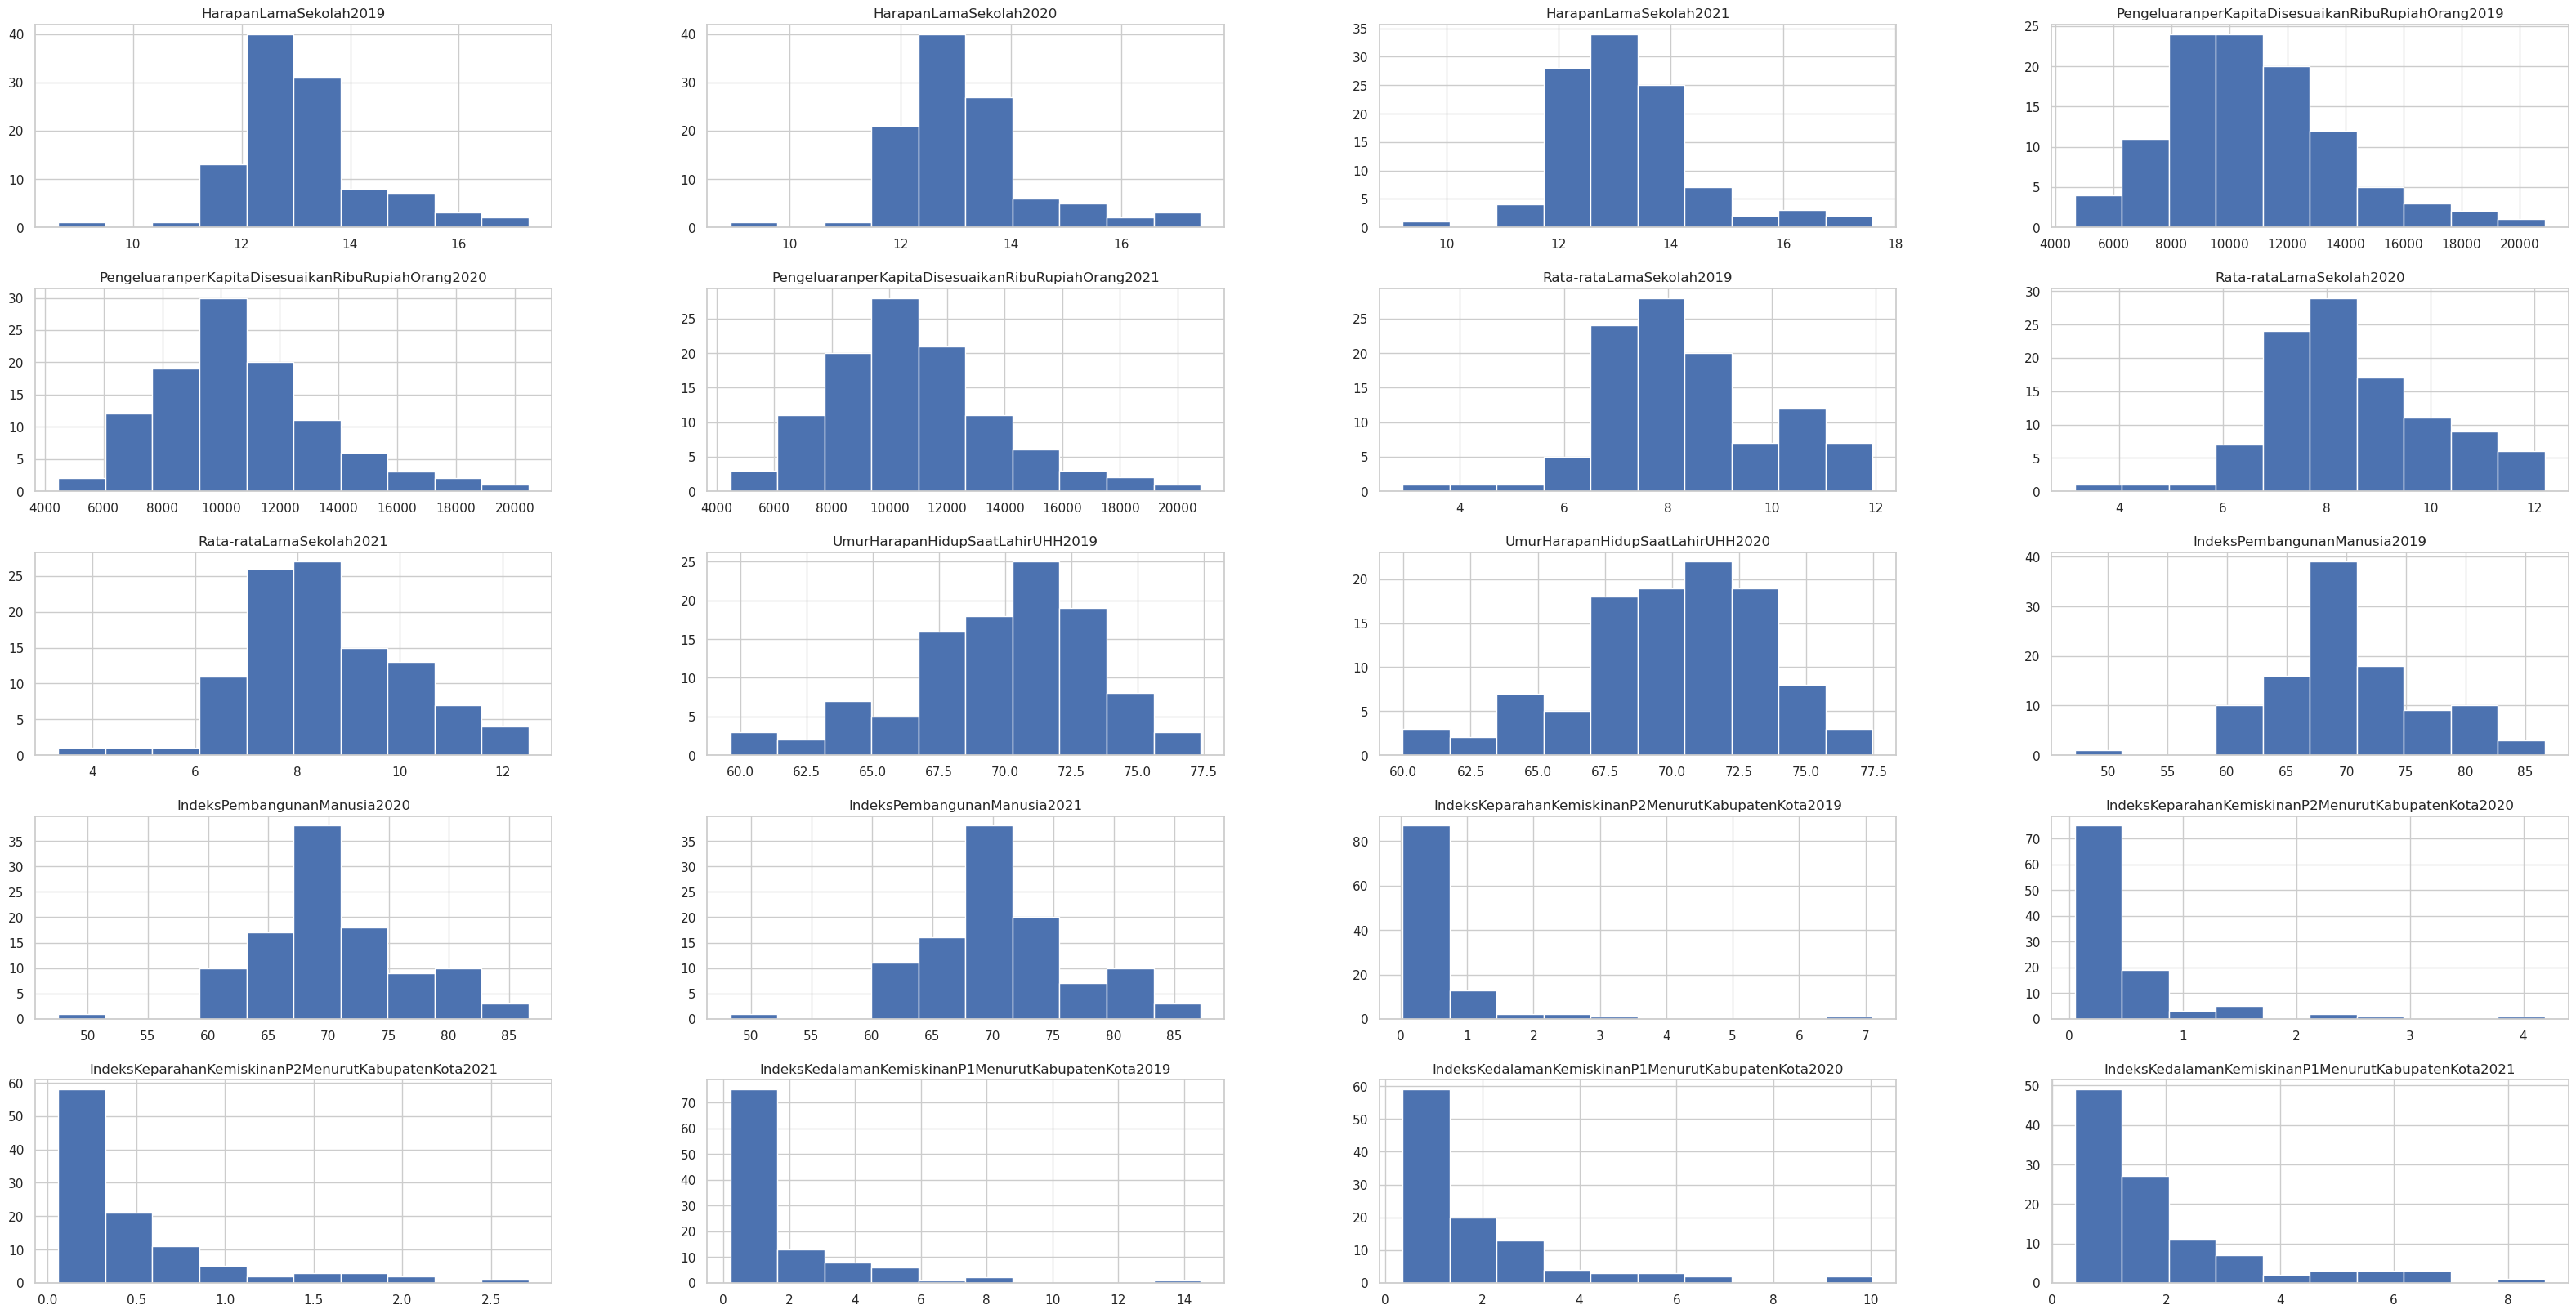

In [38]:
features = [
    'HarapanLamaSekolah2019', 'HarapanLamaSekolah2020', 'HarapanLamaSekolah2021',
    'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2019',
    'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2020',
    'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2021',
    'Rata-rataLamaSekolah2019', 'Rata-rataLamaSekolah2020', 'Rata-rataLamaSekolah2021',
    'UmurHarapanHidupSaatLahirUHH2019', 'UmurHarapanHidupSaatLahirUHH2020',
    'IndeksPembangunanManusia2019', 'IndeksPembangunanManusia2020', 'IndeksPembangunanManusia2021',
    'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2019',
    'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2020',
    'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2021',
    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2019',
    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2020',
    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2021',
]
df_test[features].hist(bins=10, figsize=(40,20))

Kolom Indeks Keparahan & Kedalaman Kemiskinan memiliki data yang sangat positive skew sehingga akan dilakukan transformasi logaritma pada data tersebut.

In [39]:
skewed_features = ['IndeksKeparahanKemiskinanP2MenurutKabupatenKota2019',
                    'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2020',
                    'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2021',
                    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2019',
                    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2020',
                    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2021']

array([[<AxesSubplot:title={'center':'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2019'}>,
        <AxesSubplot:title={'center':'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2020'}>],
       [<AxesSubplot:title={'center':'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2021'}>,
        <AxesSubplot:title={'center':'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2019'}>],
       [<AxesSubplot:title={'center':'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2020'}>,
        <AxesSubplot:title={'center':'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2021'}>]],
      dtype=object)

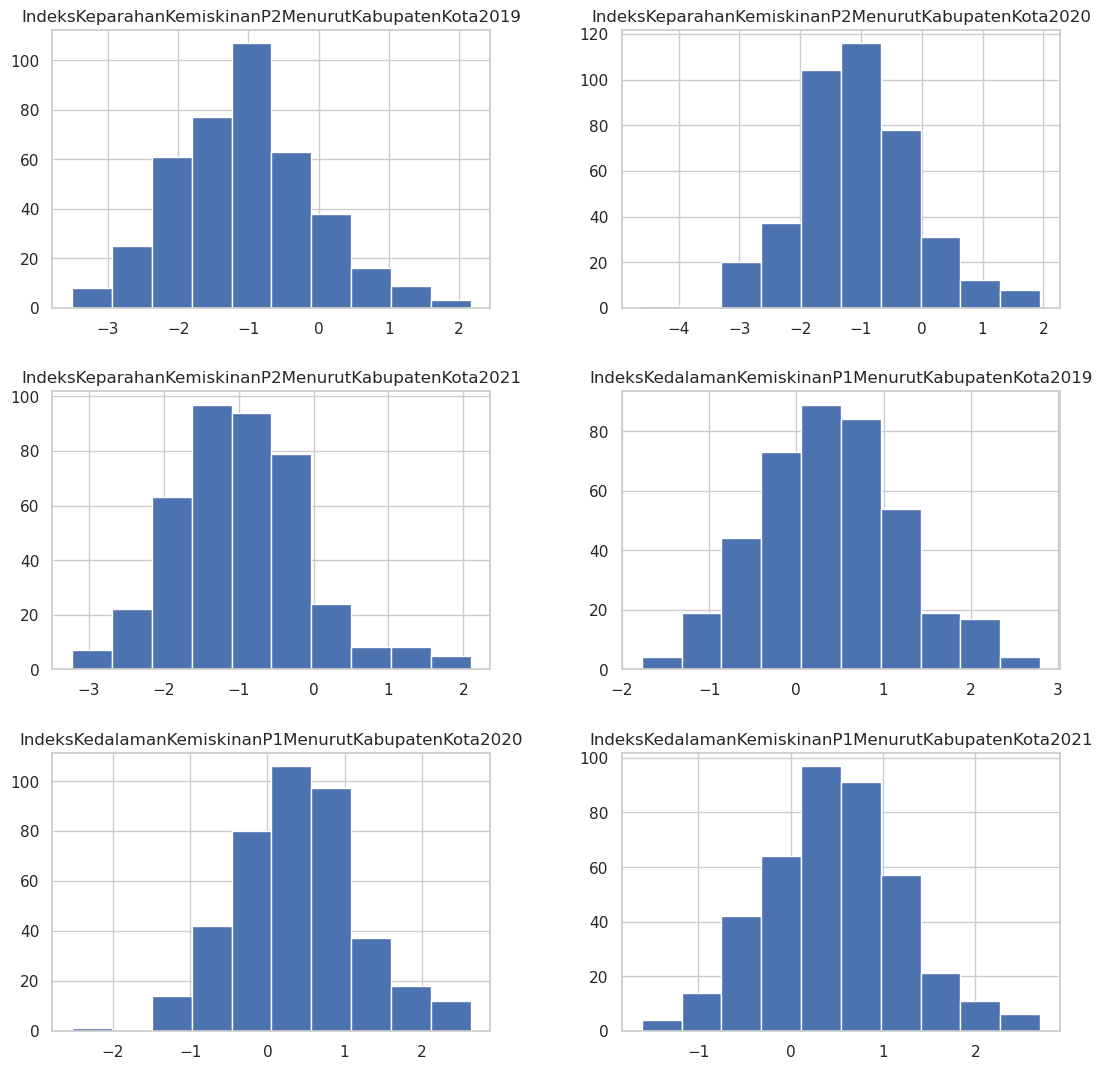

In [40]:
df_train_skewed_features = df_train[skewed_features] + 0.01
df_train[skewed_features] = df_train_skewed_features.apply(np.log)
df_train[skewed_features].hist(bins=10, figsize=(13,13))

array([[<AxesSubplot:title={'center':'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2019'}>,
        <AxesSubplot:title={'center':'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2020'}>],
       [<AxesSubplot:title={'center':'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2021'}>,
        <AxesSubplot:title={'center':'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2019'}>],
       [<AxesSubplot:title={'center':'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2020'}>,
        <AxesSubplot:title={'center':'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2021'}>]],
      dtype=object)

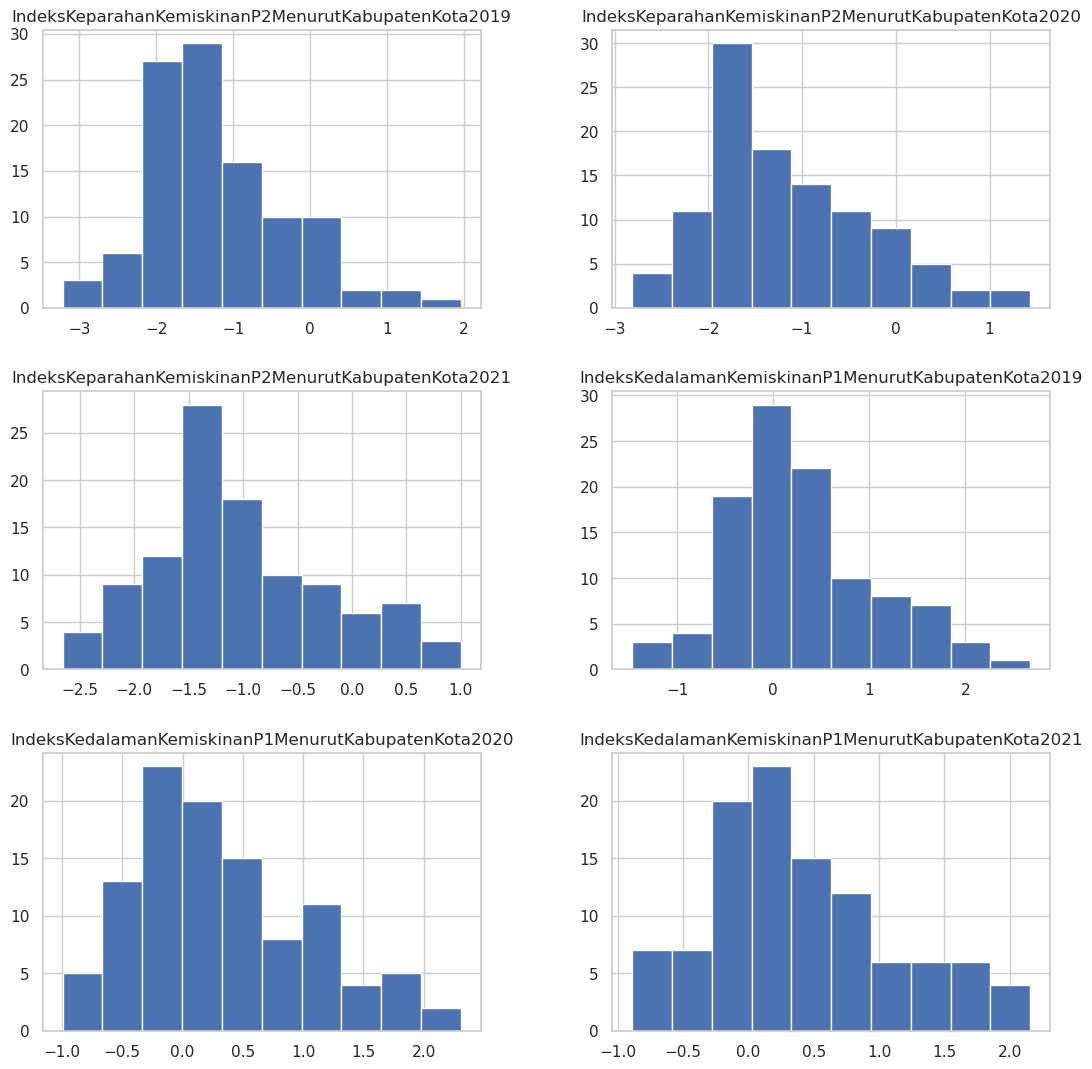

In [41]:
df_test_skewed_features = df_test[skewed_features] + 0.01
df_test[skewed_features] = df_test_skewed_features.apply(np.log)
df_test[skewed_features].hist(bins=10, figsize=(13,13))

# Modelling

Target prediksi: ```'Umur Harapan Hidup Saat Lahir (UHH) (2021)'```

## Preparation

In [42]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

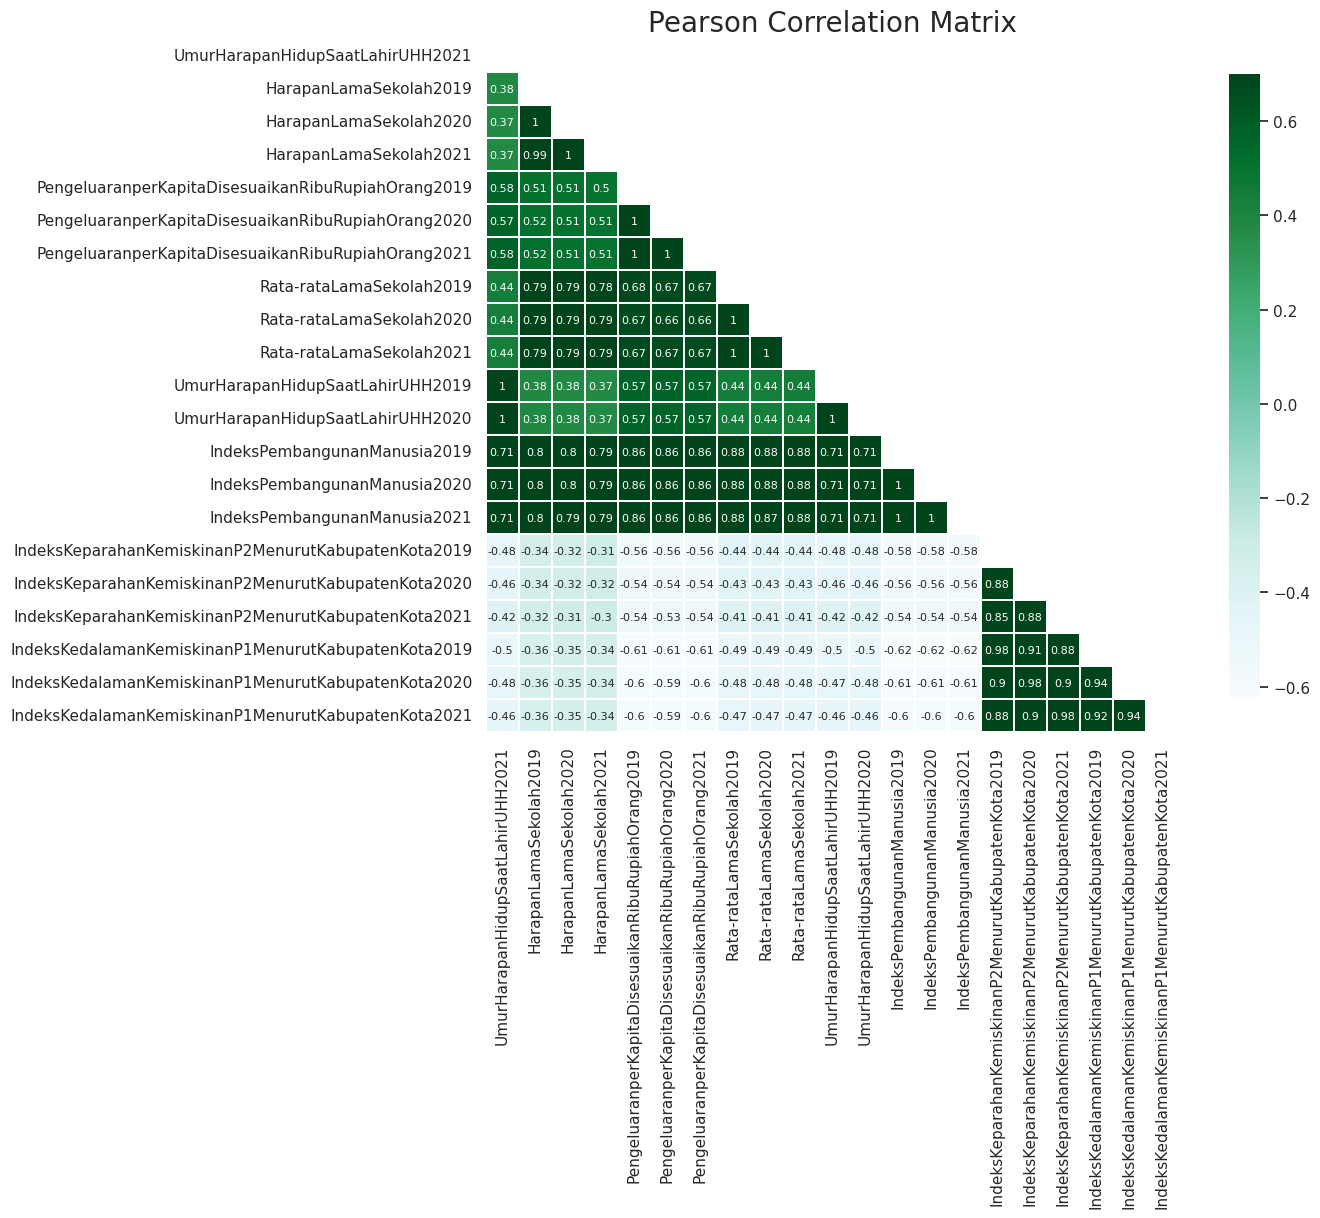

In [43]:
features = ['UmurHarapanHidupSaatLahirUHH2021',
    'HarapanLamaSekolah2019', 'HarapanLamaSekolah2020', 'HarapanLamaSekolah2021',
    'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2019',
    'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2020',
    'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2021',
    'Rata-rataLamaSekolah2019', 'Rata-rataLamaSekolah2020', 'Rata-rataLamaSekolah2021',
    'UmurHarapanHidupSaatLahirUHH2019', 'UmurHarapanHidupSaatLahirUHH2020',
    'IndeksPembangunanManusia2019', 'IndeksPembangunanManusia2020', 'IndeksPembangunanManusia2021',
    'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2019',
    'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2020',
    'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2021',
    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2019',
    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2020',
    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2021',
]

mask = np.zeros_like(df_train[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(13, 9))
plt.title('Pearson Correlation Matrix',fontsize=20)

sns.heatmap(df_train[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [44]:
train_features = [
    'HarapanLamaSekolah2019', 'HarapanLamaSekolah2020', 'HarapanLamaSekolah2021',
    'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2019',
    'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2020',
    'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2021',
    'Rata-rataLamaSekolah2019', 'Rata-rataLamaSekolah2020', 'Rata-rataLamaSekolah2021',
    'UmurHarapanHidupSaatLahirUHH2019', 'UmurHarapanHidupSaatLahirUHH2020',
    'IndeksPembangunanManusia2019', 'IndeksPembangunanManusia2020', 'IndeksPembangunanManusia2021',
    'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2019',
    'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2020',
    'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2021',
    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2019',
    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2020',
    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2021',
]
predict_feature = ['UmurHarapanHidupSaatLahirUHH2021']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_train[train_features],df_train[predict_feature],
                                                 test_size = 0.25,
                                                 random_state = 3)

## Linear Models

In [46]:
lm_evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'RootMeanSquaredError':[],
                           'RSquaredTraining':[],
                           'AdjustedRSquaredTraining':[],
                           'RSquaredTest':[],
                           'AdjustedRSquaredTest':[],
                           'FourFoldCrossValidation':[]})

# Linear Reggression
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)), '.5f'))
rtr = float(format(model.score(X_train, y_train), '.5f'))
artr = float(format(adjustedR2(model.score(X_train, y_train), df_train.shape[0], len(train_features)),'.5f'))
rte = float(format(model.score(X_test, y_test), '.5f'))
arte = float(format(adjustedR2(model.score(X_test, y_test), df_train.shape[0], len(train_features)),'.5f'))
cv = float(format(cross_val_score(model,df_train[train_features],df_train[predict_feature],cv=4).mean(),'.5f'))
r = lm_evaluation.shape[0]
lm_evaluation.loc[r] = ['Linear Regression','-',rmse,rtr,artr,rte,arte,cv]

# Ridge Regression
model = linear_model.Ridge(alpha=0.1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)), '.5f'))
rtr = float(format(model.score(X_train, y_train), '.5f'))
artr = float(format(adjustedR2(model.score(X_train, y_train), df_train.shape[0], len(train_features)),'.5f'))
rte = float(format(model.score(X_test, y_test), '.5f'))
arte = float(format(adjustedR2(model.score(X_test, y_test), df_train.shape[0], len(train_features)),'.5f'))
cv = float(format(cross_val_score(model,df_train[train_features],df_train[predict_feature],cv=4).mean(),'.5f'))
r = lm_evaluation.shape[0]
lm_evaluation.loc[r] = ['Ridge Regression','alpha=0.1',rmse,rtr,artr,rte,arte,cv]

# Lasso Regression
model = linear_model.Lasso(alpha=0.01)
model.fit(X_train, y_train)
pred = model.predict(X_test)
rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)), '.5f'))
rtr = float(format(model.score(X_train, y_train), '.5f'))
artr = float(format(adjustedR2(model.score(X_train, y_train), df_train.shape[0], len(train_features)),'.5f'))
rte = float(format(model.score(X_test, y_test), '.5f'))
arte = float(format(adjustedR2(model.score(X_test, y_test), df_train.shape[0], len(train_features)),'.5f'))
cv = float(format(cross_val_score(model,df_train[train_features],df_train[predict_feature],cv=4).mean(),'.5f'))
r = lm_evaluation.shape[0]
lm_evaluation.loc[r] = ['Lasso Regression','alpha=0.01',rmse,rtr,artr,rte,arte,cv]

lm_evaluation

,Model,Details,RootMeanSquaredError,RSquaredTraining,AdjustedRSquaredTraining,RSquaredTest,AdjustedRSquaredTest,FourFoldCrossValidation
0,Linear Regression,-,0.06333,0.99984,0.99983,0.99967,0.99965,0.99974
1,Ridge Regression,alpha=0.1,0.05759,0.99981,0.99980,0.99973,0.99971,0.99975
2,Lasso Regression,alpha=0.01,0.07681,0.99938,0.99935,0.99951,0.99949,0.99929


## Other Models

In [47]:
om_evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'RootMeanSquaredError':[],
                           'RSquaredTraining':[],
                           'AdjustedRSquaredTraining':[],
                           'RSquaredTest':[],
                           'AdjustedRSquaredTest':[],
                           'FourFoldCrossValidation':[]})

# Decision Tree Regression
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)), '.5f'))
rtr = float(format(model.score(X_train, y_train), '.5f'))
artr = float(format(adjustedR2(model.score(X_train, y_train), df_train.shape[0], len(train_features)),'.5f'))
rte = float(format(model.score(X_test, y_test), '.5f'))
arte = float(format(adjustedR2(model.score(X_test, y_test), df_train.shape[0], len(train_features)),'.5f'))
cv = float(format(cross_val_score(model,df_train[train_features],df_train[predict_feature],cv=4).mean(),'.5f'))
r = om_evaluation.shape[0]
om_evaluation.loc[r] = ['Decision Tree Regression','-',rmse,rtr,artr,rte,arte,cv]

# Random Forest Regression
model = RandomForestRegressor(n_estimators=51, max_depth=10, criterion='mse')
model.fit(X_train, y_train)
pred = model.predict(X_test)
rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)), '.5f'))
rtr = float(format(model.score(X_train, y_train), '.5f'))
artr = float(format(adjustedR2(model.score(X_train, y_train), df_train.shape[0], len(train_features)),'.5f'))
rte = float(format(model.score(X_test, y_test), '.5f'))
arte = float(format(adjustedR2(model.score(X_test, y_test), df_train.shape[0], len(train_features)),'.5f'))
cv = float(format(cross_val_score(model,df_train[train_features],df_train[predict_feature],cv=4).mean(),'.5f'))
r = om_evaluation.shape[0]
om_evaluation.loc[r] = ['Random Forest Regression','n_estimators=51, max_depth=10, criterion=mse',rmse,rtr,artr,rte,arte,cv]

om_evaluation

,Model,Details,RootMeanSquaredError,RSquaredTraining,AdjustedRSquaredTraining,RSquaredTest,AdjustedRSquaredTest,FourFoldCrossValidation
0,Decision Tree Regression,-,0.39562,1.00000,1.00000,0.98706,0.98642,0.99367
1,Random Forest Regression,"n_estimators=51, max_depth=10, criterion=mse",0.40564,0.99917,0.99913,0.98639,0.98572,0.99432


## Summary

In [48]:
evaluation = lm_evaluation.append(om_evaluation)
evaluation.sort_values(by='RootMeanSquaredError', ascending=True).reset_index().drop(columns=['index'])

,Model,Details,RootMeanSquaredError,RSquaredTraining,AdjustedRSquaredTraining,RSquaredTest,AdjustedRSquaredTest,FourFoldCrossValidation
0,Ridge Regression,alpha=0.1,0.05759,0.99981,0.99980,0.99973,0.99971,0.99975
1,Linear Regression,-,0.06333,0.99984,0.99983,0.99967,0.99965,0.99974
2,Lasso Regression,alpha=0.01,0.07681,0.99938,0.99935,0.99951,0.99949,0.99929
3,Decision Tree Regression,-,0.39562,1.00000,1.00000,0.98706,0.98642,0.99367
4,Random Forest Regression,"n_estimators=51, max_depth=10, criterion=mse",0.40564,0.99917,0.99913,0.98639,0.98572,0.99432


## Hyperparameter Tuning

In [49]:
train_features = [
    'HarapanLamaSekolah2019', 'HarapanLamaSekolah2020', 'HarapanLamaSekolah2021',
    'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2019',
    'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2020',
    'PengeluaranperKapitaDisesuaikanRibuRupiahOrang2021',
    'Rata-rataLamaSekolah2019', 'Rata-rataLamaSekolah2020', 'Rata-rataLamaSekolah2021',
    'UmurHarapanHidupSaatLahirUHH2019', 'UmurHarapanHidupSaatLahirUHH2020',
    'IndeksPembangunanManusia2019', 'IndeksPembangunanManusia2020', 'IndeksPembangunanManusia2021',
#    'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2019',
#    'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2020',
#    'IndeksKeparahanKemiskinanP2MenurutKabupatenKota2021',
#    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2019',
#    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2020',
#    'IndeksKedalamanKemiskinanP1MenurutKabupatenKota2021',
]
predict_feature = ['UmurHarapanHidupSaatLahirUHH2021']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df_train[train_features],df_train[predict_feature],
                                                 test_size = 0.25,
                                                 random_state = 3)

In [51]:
def regmodel_param_test(
    alphas_to_try, X, y, cv, scoring = 'r2', 
    model_name = 'LASSO', X_test = None, y_test = None, 
    draw_plot = False, filename = None):
    
    validation_scores = []
    train_scores = []
    results_list = []
    if X_test is not None:
        test_scores = []
        scorer = metrics.get_scorer(scoring)
    else:
        test_scores = None

    for curr_alpha in alphas_to_try:
        
        if model_name == 'LASSO':
            regmodel = linear_model.Lasso(alpha = curr_alpha)
        elif model_name == 'Ridge':
            regmodel = linear_model.Ridge(alpha = curr_alpha)
        else:
            return None

        results = cross_validate(
            regmodel, X, y, scoring=scoring, cv=cv, 
            return_train_score = True)

        validation_scores.append(np.mean(results['test_score']))
        train_scores.append(np.mean(results['train_score']))
        results_list.append(results)

        if X_test is not None:
            regmodel.fit(X,y)
            y_pred = regmodel.predict(X_test)
            test_scores.append(scorer(regmodel, X_test, y_test))
    
    chosen_alpha_id = np.argmax(validation_scores)
    chosen_alpha = alphas_to_try[chosen_alpha_id]
    max_validation_score = np.max(validation_scores)
    if X_test is not None:
        test_score_at_chosen_alpha = test_scores[chosen_alpha_id]
    else:
        test_score_at_chosen_alpha = None
        
    if draw_plot:
        regmodel_param_plot(
            validation_scores, train_scores, alphas_to_try, chosen_alpha, 
            scoring, model_name, test_scores, filename)
    
    return chosen_alpha, max_validation_score, test_score_at_chosen_alpha

def regmodel_param_plot(
    validation_score, train_score, alphas_to_try, chosen_alpha,
    scoring, model_name, test_score = None, filename = None):
    
    plt.figure(figsize = (8,8))
    sns.lineplot(y = validation_score, x = alphas_to_try, 
                 label = 'validation_data')
    sns.lineplot(y = train_score, x = alphas_to_try, 
                 label = 'training_data')
    plt.axvline(x=chosen_alpha, linestyle='--')
    if test_score is not None:
        sns.lineplot(y = test_score, x = alphas_to_try, 
                     label = 'test_data')
    plt.xlabel('alpha_parameter')
    plt.ylabel(scoring)
    plt.title(model_name + ' Regularisation')
    plt.legend()
    if filename is not None:
        plt.savefig(str(filename) + ".png")
    plt.show()

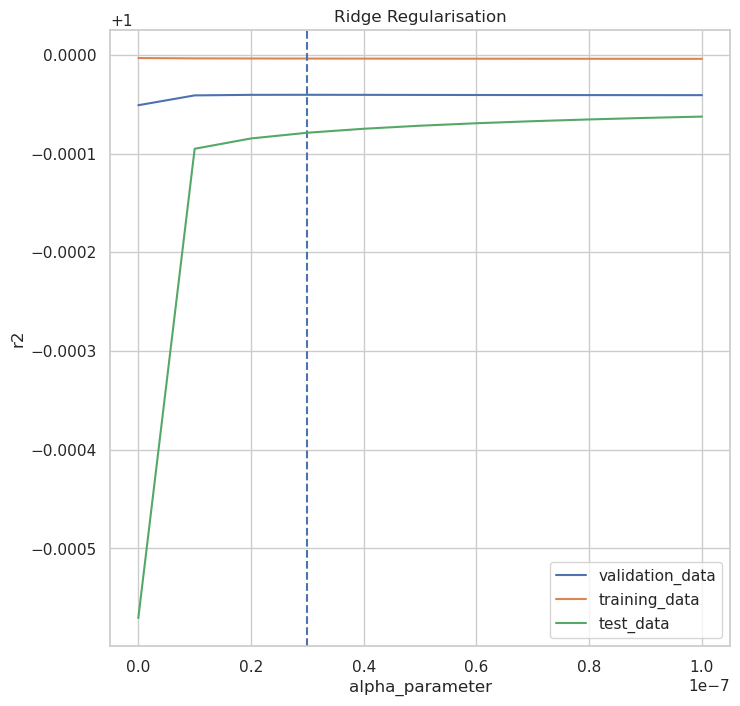

Chosen alpha: 0.00000003000000000000
Validation score: 0.99995950908415731639
Test score at chosen alpha: 0.99992106026473825953


In [52]:
poly = PolynomialFeatures(
    degree = 2, include_bias = False, interaction_only = False)

X_train_poly = poly.fit_transform(X_train)
polynomial_column_names = \
    poly.get_feature_names(input_features = X_train.columns)
X_train_poly = \
    pd.DataFrame(data = X_train_poly, 
        columns = polynomial_column_names )
X_train_poly.columns = X_train_poly.columns.str.replace(' ', '_')
X_train_poly.columns = X_train_poly.columns.str.replace('^', '_')

sc = StandardScaler()
X_train_poly_scaled = sc.fit_transform(X_train_poly)
X_train_poly_scaled = pd.DataFrame( \
        data = X_train_poly_scaled, columns = X_train_poly.columns)

X_test_poly = poly.transform(X_test)
X_test_poly_scaled = sc.transform(X_test_poly)

test_lab = poly.transform(df_test[train_features])
test_lab = sc.transform(test_lab)

cv = KFold(n_splits=5, shuffle=True, random_state=3)

lasso_alphas = np.linspace(0, 0.0000001, 11)

chosen_alpha, max_validation_score, test_score_at_chosen_alpha = \
    regmodel_param_test(
        lasso_alphas, X_train_poly_scaled, y_train, 
        cv, scoring = 'r2', model_name = 'Ridge', 
        X_test = X_test_poly_scaled, y_test = y_test, 
        draw_plot = True, filename = 'wide_search')
print("Chosen alpha: %.20f" % \
    chosen_alpha)
print("Validation score: %.20f" % \
    max_validation_score)
print("Test score at chosen alpha: %.20f" % \
    test_score_at_chosen_alpha)

In [53]:
hyper_evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'RootMeanSquaredError':[],
                           'RSquaredTraining':[],
                           'AdjustedRSquaredTraining':[],
                           'RSquaredTest':[],
                           'AdjustedRSquaredTest':[],
                           'FourFoldCrossValidation':[]})

In [54]:
# Polynomial Ridge Regression
model = linear_model.Ridge(alpha=0.00000003)
model.fit(X_train_poly_scaled, y_train)
pred = model.predict(X_test_poly_scaled)
rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)), '.5f'))
rtr = float(format(model.score(X_train_poly_scaled, y_train), '.5f'))
artr = float(format(adjustedR2(model.score(X_train_poly_scaled, y_train), df_train.shape[0], len(train_features)),'.5f'))
rte = float(format(model.score(X_test_poly_scaled, y_test), '.5f'))
arte = float(format(adjustedR2(model.score(X_test_poly_scaled, y_test), df_train.shape[0], len(train_features)),'.5f'))
cv = float(format(cross_val_score(model,df_train[train_features],df_train[predict_feature],cv=4).mean(),'.5f'))
r = hyper_evaluation.shape[0]
hyper_evaluation.loc[r] = ['Polynomial Ridge Regression','alpha=0.00000003',rmse,rtr,artr,rte,arte,cv]

hyper_evaluation

,Model,Details,RootMeanSquaredError,RSquaredTraining,AdjustedRSquaredTraining,RSquaredTest,AdjustedRSquaredTest,FourFoldCrossValidation
0,Polynomial Ridge Regression,alpha=0.00000003,0.0309,1.0,1.0,0.99992,0.99992,0.99974


In [55]:
evaluation = evaluation.append(hyper_evaluation)
evaluation.sort_values(by='RootMeanSquaredError', ascending=True).reset_index().drop(columns=['index'])

,Model,Details,RootMeanSquaredError,RSquaredTraining,AdjustedRSquaredTraining,RSquaredTest,AdjustedRSquaredTest,FourFoldCrossValidation
0,Polynomial Ridge Regression,alpha=0.00000003,0.03090,1.00000,1.00000,0.99992,0.99992,0.99974
1,Ridge Regression,alpha=0.1,0.05759,0.99981,0.99980,0.99973,0.99971,0.99975
2,Linear Regression,-,0.06333,0.99984,0.99983,0.99967,0.99965,0.99974
3,Lasso Regression,alpha=0.01,0.07681,0.99938,0.99935,0.99951,0.99949,0.99929
4,Decision Tree Regression,-,0.39562,1.00000,1.00000,0.98706,0.98642,0.99367
5,Random Forest Regression,"n_estimators=51, max_depth=10, criterion=mse",0.40564,0.99917,0.99913,0.98639,0.98572,0.99432


# Prediction

In [56]:
model = linear_model.Ridge(alpha=0.00000003)
model.fit(X_train_poly_scaled, y_train)
sub_pred = model.predict(test_lab)


submission = pd.DataFrame({"Id": df_test['Id'], 
                    "Umur Harapan Hidup Saat Lahir (UHH) (2021)": sub_pred.flatten()})
                                                                #ik_scaler.inverse_transform(sub_pred.reshape(-1,1))
submission.to_csv("submission.csv", index = False)
submission.to_excel("submission.xlsx", index = False)
submission

,Id,Umur Harapan Hidup Saat Lahir (UHH) (2021)
0,0,71.183550
1,4,68.063942
2,6,73.358722
3,7,70.503416
4,14,71.486053
...,...,...
101,501,76.286577
102,503,68.189152
103,506,73.848613
104,509,73.618865


## Perbandingan Umur Harapan Hidup per Tahun berdasarkan Prediksi Model

In [57]:
#Memasukkan hasil prediksi ke dataframe test
df_test['UmurHarapanHidupSaatLahirUHH2021'] = submission['Umur Harapan Hidup Saat Lahir (UHH) (2021)']

In [58]:
#Membuat dataframe baru khusus UHH per tahun
uhh_tahun = df_test[['UmurHarapanHidupSaatLahirUHH2019', 'UmurHarapanHidupSaatLahirUHH2020', 'UmurHarapanHidupSaatLahirUHH2021']]
uhh_tahun = uhh_tahun.rename({'UmurHarapanHidupSaatLahirUHH2019': '2019', 
                                'UmurHarapanHidupSaatLahirUHH2020': '2020', 
                                'UmurHarapanHidupSaatLahirUHH2021': '2021 (Prediksi)'}, axis=1)

Text(0.5, 1.0, 'Umur Harapan Hidup Saat Lahir (UHH)')

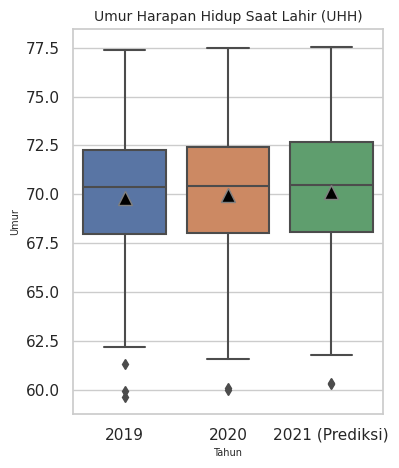

In [59]:
#Boxplot UHH per tahun
plt.figure(figsize=(4,5))
sns.set_theme(style="whitegrid")
box_plot = sns.boxplot(data=uhh_tahun,showmeans=True,
            meanprops={"markerfacecolor":"black", 
                       "markeredgecolor":"grey",
                       "markersize":"10"})

plt.xlabel('Tahun', fontdict = {'fontsize' : 7})
plt.ylabel('Umur', fontdict = {'fontsize' : 7})
plt.title('Umur Harapan Hidup Saat Lahir (UHH)', fontdict = {'fontsize' : 10})